# BABS 507 Project (Period 1 2020)
#### Instructor: Martha Essak

Replace all sections that are highlighted with your answers and remove the highlighting by deleting the code style. **Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students:
<code style="background:yellow;color:black">Jie Chen (58722208)  
Chinmay Jain (54565486) 
</code> 

---

## Table of Contents
[Project description](#Description)  
[Introduction](#Introduction)  
[Exploratory Data Analysis](#EDA)  
[Model fit to training data, checking assumptions](#Model_fit)  
[Hypothesis tests](#Hyp_tests)  
[Using the model for prediction](#Prediction)  
[Comparing to other candidate models](#Compare) 
[Discussion](#Discussion)


[Visualizing appropriate transformations](#Transformations)  
[Other candidate models](#Other_models)

---

<a id="Description"></a>
## Project description

You will develop a multiple linear regression model to predict sale price of houses (\\$ CAD) in Vancouver using the following potential candidate quantitative variables:  
- Days on market (days)
- Total floor area (square feet)
- Age (years); this is calculated from Year Built so you do not need to use Year Built
- Lot Size (square feet)

The data was collected from detached homes with sale prices of at most \\$3 million in 2019 and early 2020, prior to any impacts of the pandemic on the real estate market in Vancouver.  Note that because we are excluding all houses with prices over \\$3 million, the data may appear truncated.  

Assume that we are trying to predict sale price for the same time period that the data was collected. Consider how predicting sale price could be valuable for realtors representing both house sellers and house buyers.  

### Methods  
  
First, you will divide the dataset into a training set and a validation set. You will use the training set to develop your model. You can transform variables as appropriate. Note that if you transform age using a power transformation or a log transformation, you should add 1 year to all the values of age first.   
  
You will conduct exploratory data analysis, visualizing the relationships between the variables. You should include code for visualizing appropriate transformations at the end of the project.  

In the main part of the project, you will present the results of your best model (referred to as the final model), which you will choose by considering the following:
- checking assumptions are met
- assessing goodness of fit to the training set
- considering the variables and complexity of the model
- assessing how well the model predicts new data (using the validation set as new data)

Before creating any models, you should consider is the objective and which variables you would have access to when attempting to use the model to create predictions.

At the end of the project, you should include code for any other candidate models that you considered. 
  
You will discuss the strengths and limitations of your final model, and provide any recommendations to address the limitations.

---

---

<a id="Introduction"></a>
# Introduction

#### Objective:

To predict sale price of houses ($ CAD) in Vancouver based on some quantitative variables.


-------------------------------------------------------------------------------------------------------------------------------
#### Purpose:

Housing prices have been soaring with variations over the years, but increasing overall, year on year basis. Realtors have been finding it hard to buy/sell properties with such high variability.

This makes a house sale price prediction model extremely useful. It helps them figure out the right time and right amount of money to buy or sell a house and make recommendations accordingly.

It can also help in modelling their own profit and loss based on predicted sale prices with regards to the commissions.

Helps save them a lot of time by avoiding physical search and probable cold calls or surveys. It may also help clients get a fair price.

Having said that, when it comes to buying or selling a house, there is some amount of subjectivity attached to that. A buyer maybe willing to give much less or much more depending on how much worth it holds for them. Similarly, it can be the case with the seller as well. This can be a case of outliers or possible skewness in the data if any.


-------------------------------------------------------------------------------------------------------------------------------
#### Background information:

The Canadian Real Estate Association is pegging the average sale price of a B.C. home in 2019 at \\$720,000 – a rise of 0.9 per cent over 2018’s figure. That’s following a year-over-year increase of 0.6 per cent in 2018 to \\$713,700 – despite slow sales activity.

The data was collected from detached homes with sale prices of at most \\$3 million in 2019 and early 2020, prior to any impacts of the pandemic on the real estate market in Vancouver.  Note that because we are excluding all houses with prices over \\$3 million, the data may appear truncated.


Connolly, J. (n.d.). 2019 real estate market outlook: A forecast summary. Vancouver Is Awesome. Retrieved September 26, 2022, from https://www.vancouverisawesome.com/courier-archive/real-estate/2019-real-estate-market-outlook-a-forecast-summary-3090801

In [1]:
library(ggplot2)
library(dplyr)
install.packages('Hmisc')
install.packages('car')
library(Hmisc)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [65]:
# Import the data:
mydata <- read.csv(file="House sale data Vancouver.csv", header=TRUE)

---
*The dataset includes the following variables:*
- Number: if your observations get out of order, please sort by Number to get them back in the correct order so that everyone will work with the same training set and validation set.
- Address: Address of the house.
- List.Date: The date that the house was listed for sale.
- Price: The final sale price of the house (\\$ CAD). Note that this may differ from what the original asking price was.
- Days.on.market: how many days the house was on the market before it sold.
- Total.floor.area: the total area in square feet of the finished living space, including kitchen, bathrooms, living room, bedrooms, etc. on all floors of the house
- Year.Built: the year when the house was built.
- Age: calculated from Year.Built to represent the house age around the time of sale.
- Lot.size: the size of the lot in square feet. This includes the area of the footprint of the house, and the area of any yard or garden.
---

In [66]:

mydata.train <- mydata[1:1042,]
mydata.valid <- mydata[1043:nrow(mydata),]
mydata.train
mydata.valid

Number Address                   List.Date  Price   Days.on.market
1     1     3178 GRAVELEY STREET      5/8/2020   1500000  18           
2     2     1438 E 28TH AVENUE        1/22/2020  1300000   7           
3     3     2831 W 49TH AVENUE        6/18/2019  2650000   1           
4     4     2645 TRIUMPH STREET       6/18/2019  1385000  28           
5     5     741-743 E 10TH AVENUE     11/28/2019 1590000  17           
6     6     86 W 21ST AVENUE          3/3/2020   2565000   7           
7     7     2418 E 54TH AVENUE        8/12/2019  1303000   9           
8     8     1787 E 57TH AVENUE        6/13/2019  1150000  10           
9     9     2926 TRIMBLE STREET       8/16/2019  2500000  10           
10   10     466 E 60TH AVENUE         10/17/2019 2400000  44           
11   11     150 W 42ND AVENUE         10/24/2019 2870000  22           
12   12     4010 INVERNESS STREET     9/23/2019  1355000  71           
13   13     8233 FRENCH STREET        3/20/2019  1638000 168           
14   14     2855 W 38TH AVENUE        5/25/2020  2880000   2           
15   15     3238 E PENDER STREET      2/11/2020  1270000   1           
16   16     4329 PERRY STREET         2/3/2020   1175000  25           
17   17     2907 W 30TH AVENUE        10/30/2019 2725000  12           
18   18     2095 E 28TH AVENUE        1/5/2020   1910000  37           
19   19     4030 PRINCE ALBERT STREET 1/6/2020   1181000  60           
20   20     2241 E 4TH AVENUE         3/23/2020  2489000   4           
21   21     6168 COMMERCIAL STREET    8/7/2019   1480000  31           
22   22     1431 RUPERT STREET        4/23/2019  1300000 108           
23   23     6192 LARCH STREET         10/26/2019 2700000  65           
24   24     235 E 62ND AVENUE         2/3/2020   1300000  22           
25   25     342 E 23RD AVENUE         7/16/2019  2910000   7           
26   26     2277 BONNYVALE AVENUE     5/28/2019  1498000  16           
27   27     5515 ARGYLE STREET        3/28/2019  2240000 143           
28   28     3775 WINDSOR STREET       3/16/2020  2275000   5           
29   29     2783 E 27TH AVENUE        5/22/2019  1410000  22           
30   30     495 E 60TH AVENUE         5/1/2020   1240000   4           
⋮    ⋮      ⋮                         ⋮          ⋮       ⋮             
1013 1013   2705 E 46TH AVENUE        8/20/2019  1470000  22           
1014 1014   3266 GRAVELEY STREET      8/26/2019  1235000   0           
1015 1015   884 E 28TH AVENUE         9/3/2019   1586000   6           
1016 1016   1128 E 26TH AVENUE        7/24/2019  1260000  20           
1017 1017   8490 ADERA STREET         5/28/2019  2398000 129           
1018 1018   2425 DUNDAS STREET        9/3/2019   2000000  57           
1019 1019   3275 E 20TH AVENUE        6/25/2019  1106000 106           
1020 1020   4314 DUMFRIES STREET      11/25/2019 1558000  22           
1021 1021   3910 INVERNESS STREET     6/2/2019    960000   7           
1022 1022   5755 PRINCE ALBERT STREET 2/11/2020  1652000  24           
1023 1023   3850 LILLOOET STREET      9/30/2019  1230000   7           
1024 1024   886 E 38TH AVENUE         4/15/2019  1185000 114           
1025 1025   2148 E 4TH AVENUE         7/16/2019  1500000 182           
1026 1026   926 E 58TH AVENUE         11/6/2019  1060000   0           
1027 1027   3782 ONTARIO STREET       1/31/2020  1655000  28           
1028 1028   3037 W 42ND AVENUE        2/3/2020   2605000   8           
1029 1029   4010 W 19TH AVENUE        1/8/2019   2880000 203           
1030 1030   3980 W 23RD AVENUE        6/3/2019   3000000  15           
1031 1031   3987 TUPPER STREET        5/8/2019   2350000 147           
1032 1032   3110 NANAIMO STREET       4/1/2019   1100000  87           
1033 1033   1470 E 28TH AVENUE        10/21/2019 1600000  18           
1034 1034   2504 E 1ST AVENUE         4/23/2019  1185000  54           
1035 1035   7312 VICTORIA DRIVE       7/17/2019  1500000  30           
1036 1036   3981 W 11TH AVENUE        1/23/20

Number Address                   List.Date  Price   Days.on.market
1043 1043   3432 E 23RD AVENUE        6/11/2019  1314000  43           
1044 1044   3379 W 23RD AVENUE        9/11/2019  2175000  14           
1045 1045   5597 INVERNESS STREET     3/4/2019   1950000 145           
1046 1046   3427 MONS DRIVE           11/6/2019  1210000   1           
1047 1047   3492 E 49TH AVENUE        3/12/2020  1360000  47           
1048 1048   6282 WINDSOR STREET       12/10/2019 1380000   8           
1049 1049   4344 COLLINGWOOD STREET   2/28/2020  1850000  11           
1050 1050   2742 W 2ND AVENUE         8/30/2019  2450000  30           
1051 1051   2321 PARKER STREET        1/13/2020  1416000   0           
1052 1052   3687 HAIDA DRIVE          5/1/2019   1620000  96           
1053 1053   3089 CHARLES STREET       9/16/2019  1790000  40           
1054 1054   563 W 20TH AVENUE         5/23/2019  1860000  63           
1055 1055   5530 KERR STREET          7/22/2019  1260000  74           
1056 1056   4788 DUNBAR STREET        1/2/2020   2321905  35           
1057 1057   3265 SW MARINE DRIVE      2/11/2020  2825000   7           
1058 1058   3037 W 28TH AVENUE        3/2/2020   2500000   0           
1059 1059   2505 E KENT AVENUE NORTH  10/29/2019 1440000  24           
1060 1060   77 E KING EDWARD AVENUE   11/14/2019 1650000   3           
1061 1061   682 W 21ST AVENUE         11/3/2019  2988221   0           
1062 1062   521 E 20TH AVENUE         12/18/2019 1084600  23           
1063 1063   188 E 61ST AVENUE         8/19/2019  1250000  14           
1064 1064   3054 E 21ST AVENUE        11/25/2019 1450000   7           
1065 1065   1012 E 58TH AVENUE        7/31/2019  1905000 103           
1066 1066   174 E 48TH AVENUE         10/11/2019 2036190  50           
1067 1067   3323 E 23RD AVENUE        7/18/2019  1488000  12           
1068 1068   5588 HOLLAND STREET       9/9/2019   2800000  55           
1069 1069   3281 E 7TH AVENUE         7/12/2019  1080000   4           
1070 1070   2561 E 7TH AVENUE         7/29/2019  1354000  51           
1071 1071   1915 E 53RD AVENUE        4/1/2019   1210000  89           
1072 1072   3645 FRASER STREET        3/19/2020  1230000  53           
⋮    ⋮      ⋮                         ⋮          ⋮       ⋮             
1273 1273   385 W 22ND AVENUE         3/21/2020  2450000  20           
1274 1274   3781 W 27TH AVENUE        3/3/2020   2350000   1           
1275 1275   1733 E 1ST AVENUE         2/3/2019   2125000 321           
1276 1276   1280 E 27 AVENUE          4/23/2019  1258000  56           
1277 1277   3892 W 50TH AVENUE        11/1/2019  2135000 125           
1278 1278   535 E 31ST AVENUE         3/18/2020  1903000   5           
1279 1279   4258 ONTARIO STREET       7/24/2019  1928000   6           
1280 1280   7458 INVERNESS STREET     3/19/2019  1540000  78           
1281 1281   2690 NAPIER STREET        11/4/2019  1210000 122           
1282 1282   2011 E 4TH AVENUE         7/15/2019  1590000   8           
1283 1283   3569 ANZIO DRIVE          7/2/2019   1820000   6           
1284 1284   2890 W 11TH AVENUE        3/2/2020   2585000   7           
1285 1285   4443 W 14TH AVENUE        3/9/2020   2780000   8           
1286 1286   6061 KERR STREET          9/16/2019  1518000  14           
1287 1287   7087 CYPRESS STREET       5/30/2019  3000000   6           
1288 1288   3470 W 6TH AVENUE         5/29/2019  2135000  26           
1289 1289   6140 LANARK STREET        10/23/2019 1361400   5           
1290 1290   4866 MANOR STREET         3/16/2019   880000 257           
1291 1291   526 E 61ST AVENUE         8/21/2019  1029000  38           
1292 1292   3081 E 6TH AVENUE         1/10/2020  1425000  24           
1293 1293   628 E 19TH AVENUE         10/8/2019  1909750  12           
1294 1294   1826 E 12TH AVENUE        3/25/2020  1050000  22           
1295 1295   5260 INVERNESS STREET     4/1/2019   1180000 279           
1296 1296   2716 E 24TH AVENUE        9/16/20

---
<a id="EDA"></a>
# Exploratory data analysis

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = mydata.train$Price ~ mydata.train$Days.on.market)

Residuals:
     Min       1Q   Median       3Q      Max 
-1074817  -433250  -151314   424033  1229301 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.771e+06  2.027e+04  87.341   <2e-16 ***
mydata.train$Days.on.market 3.073e+01  2.735e+02   0.112    0.911    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 538700 on 1040 degrees of freedom
Multiple R-squared:  1.214e-05,	Adjusted R-squared:  -0.0009494 
F-statistic: 0.01262 on 1 and 1040 DF,  p-value: 0.9106


[1] 0.00348401

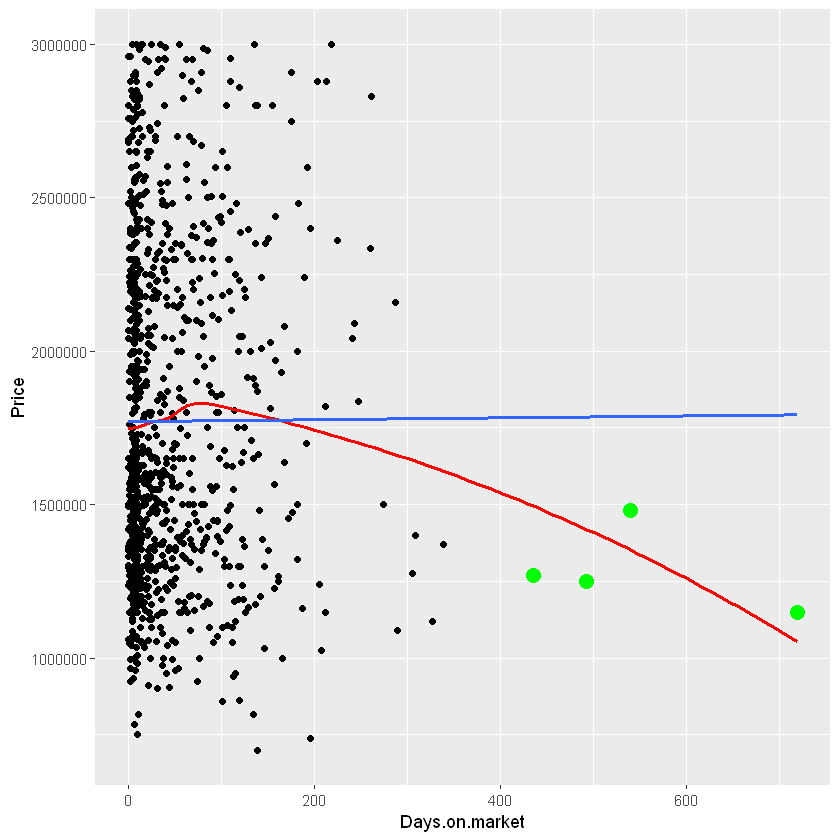

In [67]:
# code for making the plot:
#price ~ days on market
ggplot(mydata.train,aes(x=Days.on.market,y=Price))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+geom_smooth(method=lm,se=FALSE
                                                                                                              )+geom_point(data=mydata.train%>%filter(Days.on.market>400),size=4,color="green")
summary(lm(mydata.train$Price ~ mydata.train$Days.on.market))
cor(mydata.train$Price, mydata.train$Days.on.market)

---
Red line: Lowess line ; Blue line: Regression line ; Green dots: Influential Outliers
1. Form: The graph shows that the relationship of Days.on.market and price is non-linear. Although some points follow the 
blue line and go down, most points failed to follow the line trend.
2. Direction: From the correlation we caluculated which is only 0.003, the direction is almost horizontal. This means the 
house price is not associate with days on market.
3. Strength: The R-square from the sumamry which is 0.00001214 showed the strength is weak. 
4. Outliers: From the scatterplot, we found four outliers on the graph. The first reason is these four points are significantly far away from the major points. The second reason is these point influence the trend of the lowess line.
---

[1] "Blue line: Lowess line ; Red line: Regression line ; Green dots: Influential Outliers"

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = mydata.train$Price ~ mydata.train$Total.floor.area)

Residuals:
     Min       1Q   Median       3Q      Max 
-1244927  -309103  -101646   263813  1902266 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   664598.73   49477.04   13.43   <2e-16 ***
mydata.train$Total.floor.area    451.14      19.39   23.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 436900 on 1040 degrees of freedom
Multiple R-squared:  0.3423,	Adjusted R-squared:  0.3417 
F-statistic: 541.3 on 1 and 1040 DF,  p-value: < 2.2e-16


[1] 0.5850913

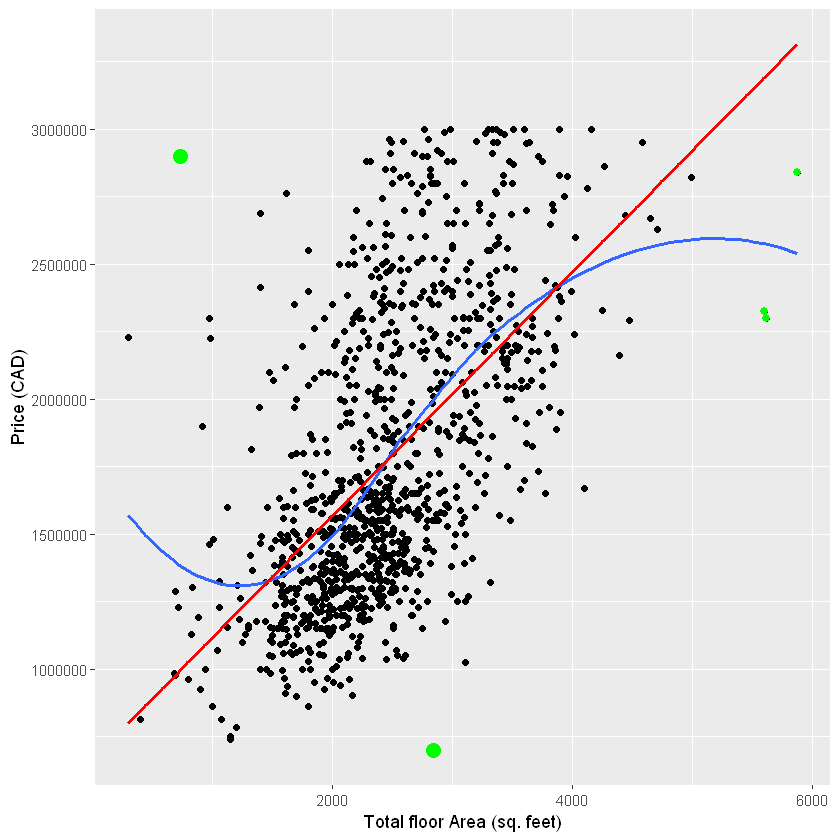

In [68]:
#price ~ Total.floor.area
"Blue line: Lowess line ; Red line: Regression line ; Green dots: Influential Outliers"
ggplot(mydata.train,aes(x=Total.floor.area,y=Price))+geom_point()+geom_smooth(method=loess,se=FALSE)+geom_smooth(method=lm,se=FALSE,color='red')+geom_point(data=mydata.train%>%filter(Price>2500000 & Total.floor.area<1000),size=4,color="green")+geom_point(data=mydata.train%>%filter(Price<750000 & Total.floor.area>2000),size=4,color="green")+
geom_point(data=mydata.train%>%filter(Total.floor.area>5200),size=2,color="green") +
xlab("Total floor Area (sq. feet)") + ylab("Price (CAD)")
summary(lm(mydata.train$Price ~ mydata.train$Total.floor.area))
cor(mydata.train$Price, mydata.train$Total.floor.area)

---
Blue line: Lowess line ; Red line: Regression line ; Green dots: Influential Outliers
1. Form: The graph shows that the relationship of Total.floor.area and price is linear(red line).
2. Direction: From the correlation we caluculated, the direction is positive. 
3. Strength: The R-square from the sumamry showed the strength is moderate. 
4. Outliers: From the scatterplot, we found five outliers. Fisrt two which are house on 3962 W 30TH AVENUE (top point) and house on 3090 KINGS AVENUE (bottom point). The last three affect the lowess line so that they are outliers.
---

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = mydata.train$Price ~ mydata.train$Age)

Residuals:
     Min       1Q   Median       3Q      Max 
-1091693  -422510  -153732   363475  1391758 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1987636      31906  62.297  < 2e-16 ***
mydata.train$Age    -3698        471  -7.852 1.01e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 523400 on 1040 degrees of freedom
Multiple R-squared:  0.05597,	Adjusted R-squared:  0.05506 
F-statistic: 61.66 on 1 and 1040 DF,  p-value: 1.013e-14


[1] -0.2365744

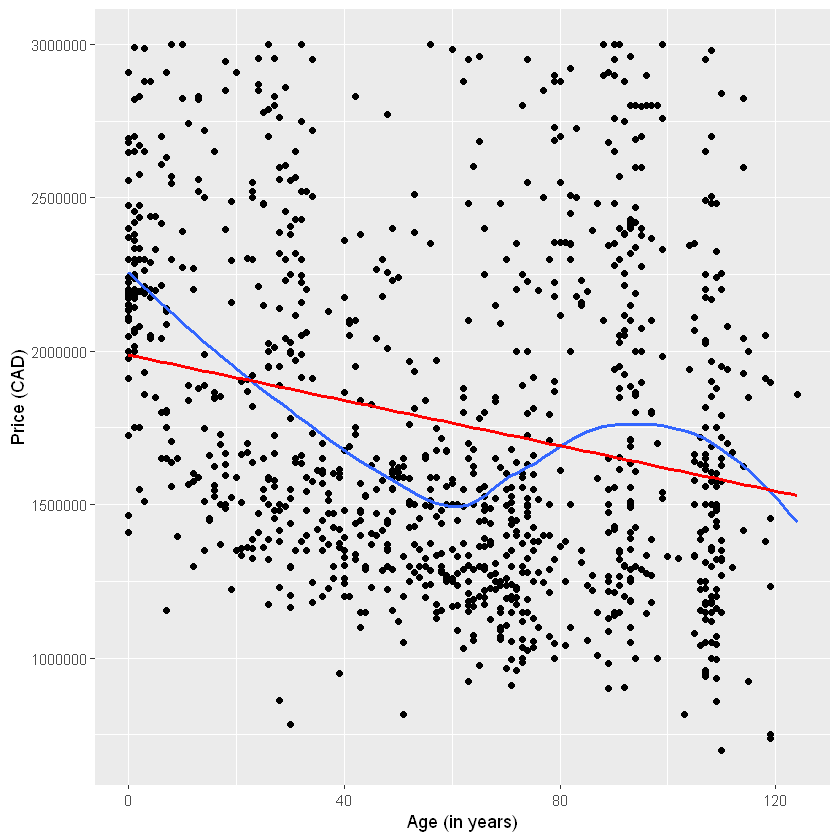

In [69]:
#price ~ Age
ggplot(mydata.train,aes(x=Age,y=Price))+geom_point()+geom_smooth(method=loess,se=FALSE)+
geom_smooth(method=lm,se=FALSE,color='red') + xlab("Age (in years)") + ylab("Price (CAD)")
summary(lm(mydata.train$Price ~ mydata.train$Age))
cor(mydata.train$Price, mydata.train$Age)

---
Blue line: Lowess line ; Red line: Regression line
1. Form: The graph shows that the relationship of Age and price is slightly non linear.
2. Direction: From the correlation we caluculated, the direction is negative. 
3. Strength: The R-square from the sumamry showed the strength is weak.
4. Outliers: From the scatterplot, it is hard to find the outliers. Based on the scatterplot we have, there is no observation which is too far from the main data. Therefore, we conclude that there is no outliers.
---

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = mydata.train$Price ~ mydata.train$Lot.Size)

Residuals:
     Min       1Q   Median       3Q      Max 
-1470676  -396711  -122121   396383  1288955 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.034e+06  5.399e+04   19.15   <2e-16 ***
mydata.train$Lot.Size 1.688e+02  1.185e+01   14.25   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 492700 on 1040 degrees of freedom
Multiple R-squared:  0.1634,	Adjusted R-squared:  0.1626 
F-statistic: 203.1 on 1 and 1040 DF,  p-value: < 2.2e-16


[1] 0.4041716

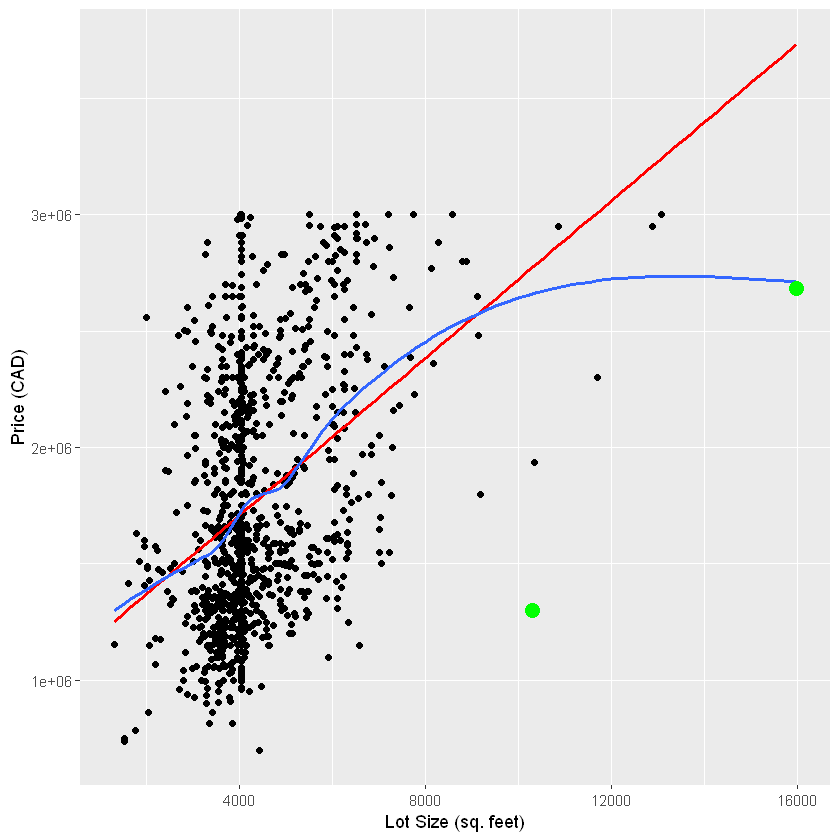

In [70]:
#price ~ Lot.Size
ggplot(mydata.train,aes(x=Lot.Size,y=Price))+geom_point()+geom_smooth(method=lm,se=FALSE,color='red')+
geom_smooth(method=loess,se=FALSE)+
geom_point(data=mydata.train%>%filter(Price<1500000 & Lot.Size>10000), size=4, color="green") +
geom_point(data=mydata.train%>%filter(Price>900000 & Lot.Size>15000), size=4, color="green") +
xlab("Lot Size (sq. feet)") + ylab("Price (CAD)")
summary(lm(mydata.train$Price ~ mydata.train$Lot.Size))
cor(mydata.train$Price, mydata.train$Lot.Size)

---
Blue line: Lowess line ; Red line: Regression line ; Green dots: Influential Outliers
1. Form: The graph shows that the relationship of Age and price is linear for the most part. If we exclude the outlier to top right it may make the loess line straighter 
2. Direction: From the correlation we caluculated, the direction is postive. 
3. Strength: The R-square from the sumamry showed the strength is weak. 
4. Outliers: From the scatterplot, we found one outlier which is house on 92 MALTA PLACE.
---

Association for <code style="background:yellow;color:black"> y vs x. </code>
    1. Form: 
    2. Direction: 
    3. Strength: 
    4. Outliers: 

---
<a id="Model_fit"></a>
# Model fit to training data, checking assumptions


---
Steps in regression analysis
1. Create scatterplot
2. Transform variable(s) if necessary to improve linearity, equal variance
3. Check assumptions
4. Test significance of the regression
5. Assess goodness of fit
6. Calculate CI’s and test hypotheses for true co-efficients
7. Calculate CI for mean predicted y or prediction interval for a given x
---


# Reading the file again - House sale data Vancouver.csv


In [71]:
mydata <- read.csv(file="House sale data Vancouver.csv", header=TRUE)
mydata

Number Address                   List.Date  Price   Days.on.market
1     1     3178 GRAVELEY STREET      5/8/2020   1500000  18           
2     2     1438 E 28TH AVENUE        1/22/2020  1300000   7           
3     3     2831 W 49TH AVENUE        6/18/2019  2650000   1           
4     4     2645 TRIUMPH STREET       6/18/2019  1385000  28           
5     5     741-743 E 10TH AVENUE     11/28/2019 1590000  17           
6     6     86 W 21ST AVENUE          3/3/2020   2565000   7           
7     7     2418 E 54TH AVENUE        8/12/2019  1303000   9           
8     8     1787 E 57TH AVENUE        6/13/2019  1150000  10           
9     9     2926 TRIMBLE STREET       8/16/2019  2500000  10           
10   10     466 E 60TH AVENUE         10/17/2019 2400000  44           
11   11     150 W 42ND AVENUE         10/24/2019 2870000  22           
12   12     4010 INVERNESS STREET     9/23/2019  1355000  71           
13   13     8233 FRENCH STREET        3/20/2019  1638000 168           
14   14     2855 W 38TH AVENUE        5/25/2020  2880000   2           
15   15     3238 E PENDER STREET      2/11/2020  1270000   1           
16   16     4329 PERRY STREET         2/3/2020   1175000  25           
17   17     2907 W 30TH AVENUE        10/30/2019 2725000  12           
18   18     2095 E 28TH AVENUE        1/5/2020   1910000  37           
19   19     4030 PRINCE ALBERT STREET 1/6/2020   1181000  60           
20   20     2241 E 4TH AVENUE         3/23/2020  2489000   4           
21   21     6168 COMMERCIAL STREET    8/7/2019   1480000  31           
22   22     1431 RUPERT STREET        4/23/2019  1300000 108           
23   23     6192 LARCH STREET         10/26/2019 2700000  65           
24   24     235 E 62ND AVENUE         2/3/2020   1300000  22           
25   25     342 E 23RD AVENUE         7/16/2019  2910000   7           
26   26     2277 BONNYVALE AVENUE     5/28/2019  1498000  16           
27   27     5515 ARGYLE STREET        3/28/2019  2240000 143           
28   28     3775 WINDSOR STREET       3/16/2020  2275000   5           
29   29     2783 E 27TH AVENUE        5/22/2019  1410000  22           
30   30     495 E 60TH AVENUE         5/1/2020   1240000   4           
⋮    ⋮      ⋮                         ⋮          ⋮       ⋮             
1273 1273   385 W 22ND AVENUE         3/21/2020  2450000  20           
1274 1274   3781 W 27TH AVENUE        3/3/2020   2350000   1           
1275 1275   1733 E 1ST AVENUE         2/3/2019   2125000 321           
1276 1276   1280 E 27 AVENUE          4/23/2019  1258000  56           
1277 1277   3892 W 50TH AVENUE        11/1/2019  2135000 125           
1278 1278   535 E 31ST AVENUE         3/18/2020  1903000   5           
1279 1279   4258 ONTARIO STREET       7/24/2019  1928000   6           
1280 1280   7458 INVERNESS STREET     3/19/2019  1540000  78           
1281 1281   2690 NAPIER STREET        11/4/2019  1210000 122           
1282 1282   2011 E 4TH AVENUE         7/15/2019  1590000   8           
1283 1283   3569 ANZIO DRIVE          7/2/2019   1820000   6           
1284 1284   2890 W 11TH AVENUE        3/2/2020   2585000   7           
1285 1285   4443 W 14TH AVENUE        3/9/2020   2780000   8           
1286 1286   6061 KERR STREET          9/16/2019  1518000  14           
1287 1287   7087 CYPRESS STREET       5/30/2019  3000000   6           
1288 1288   3470 W 6TH AVENUE         5/29/2019  2135000  26           
1289 1289   6140 LANARK STREET        10/23/2019 1361400   5           
1290 1290   4866 MANOR STREET         3/16/2019   880000 257           
1291 1291   526 E 61ST AVENUE         8/21/2019  1029000  38           
1292 1292   3081 E 6TH AVENUE         1/10/2020  1425000  24           
1293 1293   628 E 19TH AVENUE         10/8/2019  1909750  12           
1294 1294   1826 E 12TH AVENUE        3/25/2020  1050000  22           
1295 1295   5260 INVERNESS STREET     4/1/2019   1180000 279           
1296 1296   2716 E 24TH AVENUE        9/16/20


# Initiating the checkresiduals function 


In [72]:
checkresiduals <- function(z.linear) {
  predict.values <- predict(z.linear)
  resid.values <- resid(z.linear)
  
  
  if (max(resid.values) > 3*summary(z.linear)$sigma) {
    ymax <-  max(resid.values)
  } else {
    ymax <-  3*summary(z.linear)$sigma 
  }
  
  if (min(resid.values) < -3*summary(z.linear)$sigma) {
    ymin <-  min(resid.values)
  } else {
    ymin <-  -3*summary(z.linear)$sigma 
  }
  
  
  par(mfrow=c(2,2))
  plot(resid.values ~ predict.values, ylim=c(ymin, ymax), main = "Residual plot")
  abline(0,0, lty=2)
  se <- summary(z.linear)$sigma
  abline(2*se, 0, col="red", lty=2)
  abline(-2*se, 0, col="red", lty=2)
  
  
  plot(resid.values, main = "Resid vs. obs #")
  abline(0,0, lty=2)
  lines(resid.values)
  
    
  hist(resid.values, prob = TRUE)
  curve(dnorm(x, mean = mean(resid.values), sd = sd(resid.values)), col = 'red', add = TRUE)
  
    
  qqnorm(resid.values, ylab= "standardized residuals", xlab = "Normal scores")
  qqline(resid.values, col= "red")
  
  shapiro.test(resid.values)
}

In [73]:
mydata.train <- mydata[1:1042,]
mydata.valid <- mydata[1043:nrow(mydata),]
mydata.train
mydata.valid

Number Address                   List.Date  Price   Days.on.market
1     1     3178 GRAVELEY STREET      5/8/2020   1500000  18           
2     2     1438 E 28TH AVENUE        1/22/2020  1300000   7           
3     3     2831 W 49TH AVENUE        6/18/2019  2650000   1           
4     4     2645 TRIUMPH STREET       6/18/2019  1385000  28           
5     5     741-743 E 10TH AVENUE     11/28/2019 1590000  17           
6     6     86 W 21ST AVENUE          3/3/2020   2565000   7           
7     7     2418 E 54TH AVENUE        8/12/2019  1303000   9           
8     8     1787 E 57TH AVENUE        6/13/2019  1150000  10           
9     9     2926 TRIMBLE STREET       8/16/2019  2500000  10           
10   10     466 E 60TH AVENUE         10/17/2019 2400000  44           
11   11     150 W 42ND AVENUE         10/24/2019 2870000  22           
12   12     4010 INVERNESS STREET     9/23/2019  1355000  71           
13   13     8233 FRENCH STREET        3/20/2019  1638000 168           
14   14     2855 W 38TH AVENUE        5/25/2020  2880000   2           
15   15     3238 E PENDER STREET      2/11/2020  1270000   1           
16   16     4329 PERRY STREET         2/3/2020   1175000  25           
17   17     2907 W 30TH AVENUE        10/30/2019 2725000  12           
18   18     2095 E 28TH AVENUE        1/5/2020   1910000  37           
19   19     4030 PRINCE ALBERT STREET 1/6/2020   1181000  60           
20   20     2241 E 4TH AVENUE         3/23/2020  2489000   4           
21   21     6168 COMMERCIAL STREET    8/7/2019   1480000  31           
22   22     1431 RUPERT STREET        4/23/2019  1300000 108           
23   23     6192 LARCH STREET         10/26/2019 2700000  65           
24   24     235 E 62ND AVENUE         2/3/2020   1300000  22           
25   25     342 E 23RD AVENUE         7/16/2019  2910000   7           
26   26     2277 BONNYVALE AVENUE     5/28/2019  1498000  16           
27   27     5515 ARGYLE STREET        3/28/2019  2240000 143           
28   28     3775 WINDSOR STREET       3/16/2020  2275000   5           
29   29     2783 E 27TH AVENUE        5/22/2019  1410000  22           
30   30     495 E 60TH AVENUE         5/1/2020   1240000   4           
⋮    ⋮      ⋮                         ⋮          ⋮       ⋮             
1013 1013   2705 E 46TH AVENUE        8/20/2019  1470000  22           
1014 1014   3266 GRAVELEY STREET      8/26/2019  1235000   0           
1015 1015   884 E 28TH AVENUE         9/3/2019   1586000   6           
1016 1016   1128 E 26TH AVENUE        7/24/2019  1260000  20           
1017 1017   8490 ADERA STREET         5/28/2019  2398000 129           
1018 1018   2425 DUNDAS STREET        9/3/2019   2000000  57           
1019 1019   3275 E 20TH AVENUE        6/25/2019  1106000 106           
1020 1020   4314 DUMFRIES STREET      11/25/2019 1558000  22           
1021 1021   3910 INVERNESS STREET     6/2/2019    960000   7           
1022 1022   5755 PRINCE ALBERT STREET 2/11/2020  1652000  24           
1023 1023   3850 LILLOOET STREET      9/30/2019  1230000   7           
1024 1024   886 E 38TH AVENUE         4/15/2019  1185000 114           
1025 1025   2148 E 4TH AVENUE         7/16/2019  1500000 182           
1026 1026   926 E 58TH AVENUE         11/6/2019  1060000   0           
1027 1027   3782 ONTARIO STREET       1/31/2020  1655000  28           
1028 1028   3037 W 42ND AVENUE        2/3/2020   2605000   8           
1029 1029   4010 W 19TH AVENUE        1/8/2019   2880000 203           
1030 1030   3980 W 23RD AVENUE        6/3/2019   3000000  15           
1031 1031   3987 TUPPER STREET        5/8/2019   2350000 147           
1032 1032   3110 NANAIMO STREET       4/1/2019   1100000  87           
1033 1033   1470 E 28TH AVENUE        10/21/2019 1600000  18           
1034 1034   2504 E 1ST AVENUE         4/23/2019  1185000  54           
1035 1035   7312 VICTORIA DRIVE       7/17/2019  1500000  30           
1036 1036   3981 W 11TH AVENUE        1/23/20

Number Address                   List.Date  Price   Days.on.market
1043 1043   3432 E 23RD AVENUE        6/11/2019  1314000  43           
1044 1044   3379 W 23RD AVENUE        9/11/2019  2175000  14           
1045 1045   5597 INVERNESS STREET     3/4/2019   1950000 145           
1046 1046   3427 MONS DRIVE           11/6/2019  1210000   1           
1047 1047   3492 E 49TH AVENUE        3/12/2020  1360000  47           
1048 1048   6282 WINDSOR STREET       12/10/2019 1380000   8           
1049 1049   4344 COLLINGWOOD STREET   2/28/2020  1850000  11           
1050 1050   2742 W 2ND AVENUE         8/30/2019  2450000  30           
1051 1051   2321 PARKER STREET        1/13/2020  1416000   0           
1052 1052   3687 HAIDA DRIVE          5/1/2019   1620000  96           
1053 1053   3089 CHARLES STREET       9/16/2019  1790000  40           
1054 1054   563 W 20TH AVENUE         5/23/2019  1860000  63           
1055 1055   5530 KERR STREET          7/22/2019  1260000  74           
1056 1056   4788 DUNBAR STREET        1/2/2020   2321905  35           
1057 1057   3265 SW MARINE DRIVE      2/11/2020  2825000   7           
1058 1058   3037 W 28TH AVENUE        3/2/2020   2500000   0           
1059 1059   2505 E KENT AVENUE NORTH  10/29/2019 1440000  24           
1060 1060   77 E KING EDWARD AVENUE   11/14/2019 1650000   3           
1061 1061   682 W 21ST AVENUE         11/3/2019  2988221   0           
1062 1062   521 E 20TH AVENUE         12/18/2019 1084600  23           
1063 1063   188 E 61ST AVENUE         8/19/2019  1250000  14           
1064 1064   3054 E 21ST AVENUE        11/25/2019 1450000   7           
1065 1065   1012 E 58TH AVENUE        7/31/2019  1905000 103           
1066 1066   174 E 48TH AVENUE         10/11/2019 2036190  50           
1067 1067   3323 E 23RD AVENUE        7/18/2019  1488000  12           
1068 1068   5588 HOLLAND STREET       9/9/2019   2800000  55           
1069 1069   3281 E 7TH AVENUE         7/12/2019  1080000   4           
1070 1070   2561 E 7TH AVENUE         7/29/2019  1354000  51           
1071 1071   1915 E 53RD AVENUE        4/1/2019   1210000  89           
1072 1072   3645 FRASER STREET        3/19/2020  1230000  53           
⋮    ⋮      ⋮                         ⋮          ⋮       ⋮             
1273 1273   385 W 22ND AVENUE         3/21/2020  2450000  20           
1274 1274   3781 W 27TH AVENUE        3/3/2020   2350000   1           
1275 1275   1733 E 1ST AVENUE         2/3/2019   2125000 321           
1276 1276   1280 E 27 AVENUE          4/23/2019  1258000  56           
1277 1277   3892 W 50TH AVENUE        11/1/2019  2135000 125           
1278 1278   535 E 31ST AVENUE         3/18/2020  1903000   5           
1279 1279   4258 ONTARIO STREET       7/24/2019  1928000   6           
1280 1280   7458 INVERNESS STREET     3/19/2019  1540000  78           
1281 1281   2690 NAPIER STREET        11/4/2019  1210000 122           
1282 1282   2011 E 4TH AVENUE         7/15/2019  1590000   8           
1283 1283   3569 ANZIO DRIVE          7/2/2019   1820000   6           
1284 1284   2890 W 11TH AVENUE        3/2/2020   2585000   7           
1285 1285   4443 W 14TH AVENUE        3/9/2020   2780000   8           
1286 1286   6061 KERR STREET          9/16/2019  1518000  14           
1287 1287   7087 CYPRESS STREET       5/30/2019  3000000   6           
1288 1288   3470 W 6TH AVENUE         5/29/2019  2135000  26           
1289 1289   6140 LANARK STREET        10/23/2019 1361400   5           
1290 1290   4866 MANOR STREET         3/16/2019   880000 257           
1291 1291   526 E 61ST AVENUE         8/21/2019  1029000  38           
1292 1292   3081 E 6TH AVENUE         1/10/2020  1425000  24           
1293 1293   628 E 19TH AVENUE         10/8/2019  1909750  12           
1294 1294   1826 E 12TH AVENUE        3/25/2020  1050000  22           
1295 1295   5260 INVERNESS STREET     4/1/2019   1180000 279           
1296 1296   2716 E 24TH AVENUE        9/16/20

# First we want to do some transfromations


In [74]:
mydata.train$Price.log<-log(mydata.train$Price)
mydata.train$Price.sqrt<-sqrt(mydata.train$Price)
mydata.train$Days.on.market.log<-log(mydata.train$Days.on.market + 1)
mydata.train$Total.floor.area.log<-log(mydata.train$Total.floor.area)
mydata.train$Lot.size.log<-log(mydata.train$Lot.Size)
mydata.train$Age.log<-log(mydata.train$Age+1)
mydata.train$Price.sq<-(mydata.train$Price)^2
mydata.train$Days.on.market.sq<-(mydata.train$Days.on.market)^2
mydata.train$Total.floor.area.sq<-(mydata.train$Total.floor.area)^2
mydata.train$Lot.Size.sq<-(mydata.train$Lot.Size)^2
mydata.train$Age.sq<-(mydata.train$Age+1)^2

# Visualizing the relationship between Days on list and price and relationship age and price and whether any transformation makes them a linear relationship or not


# Days on market and Price

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



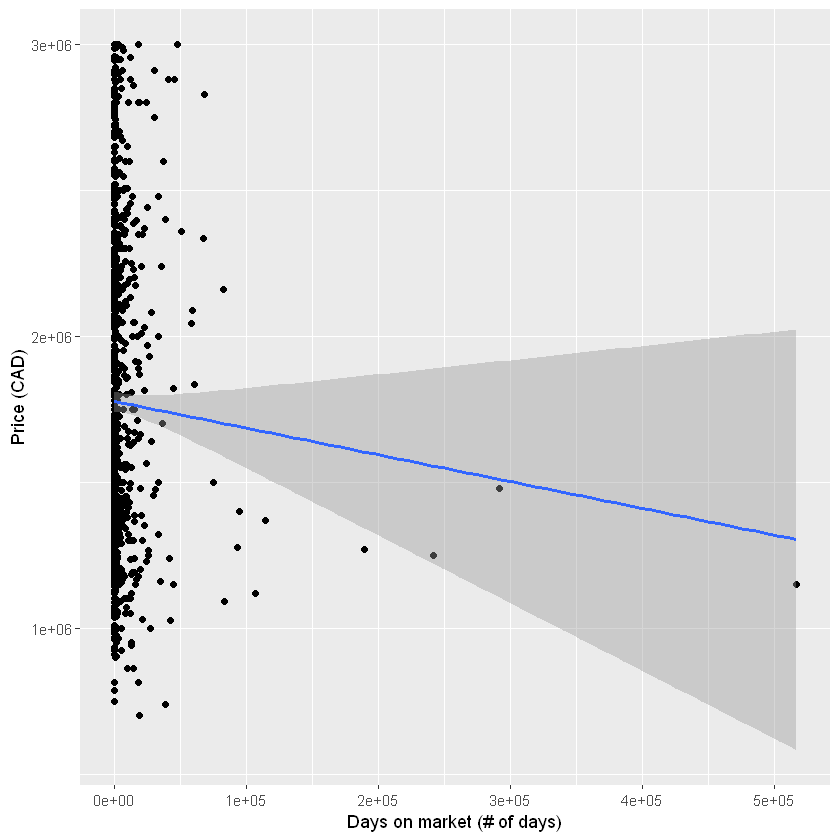

`geom_smooth()` using formula 'y ~ x'



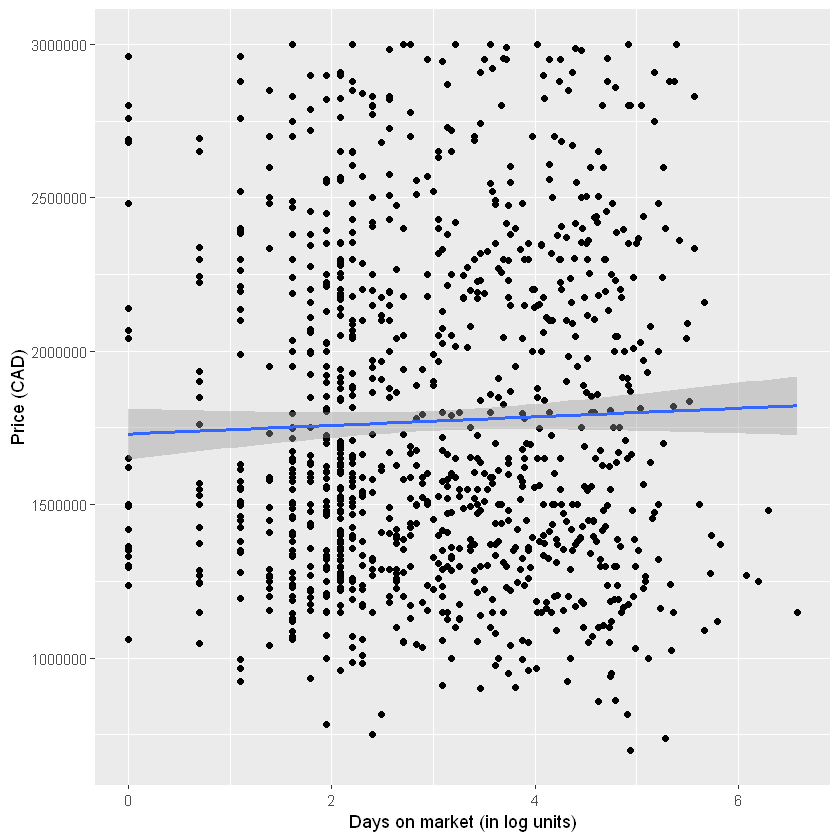

`geom_smooth()` using formula 'y ~ x'



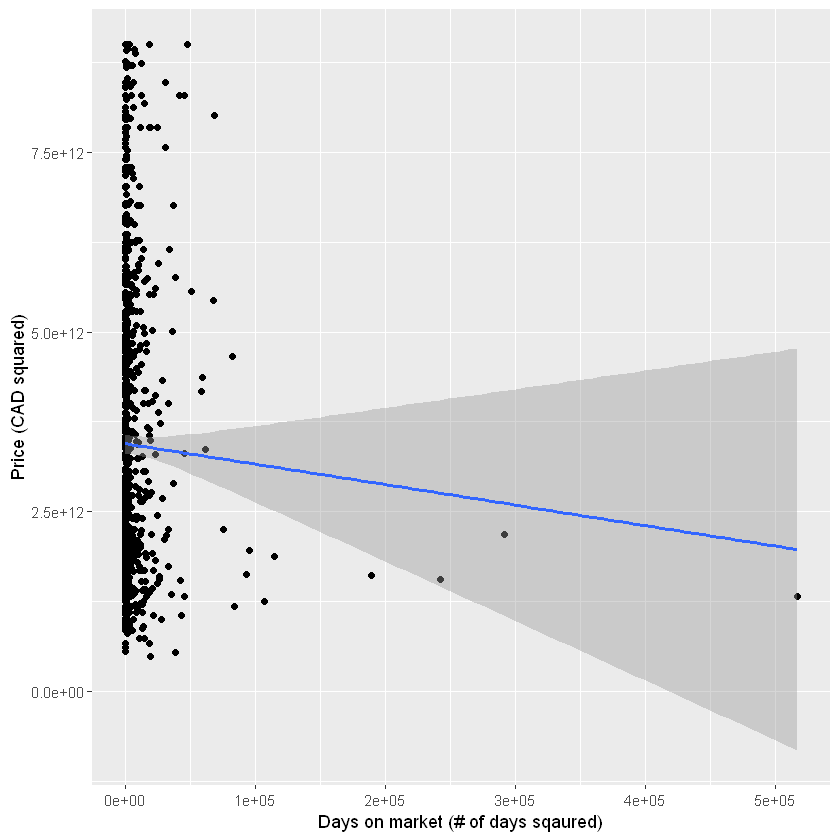

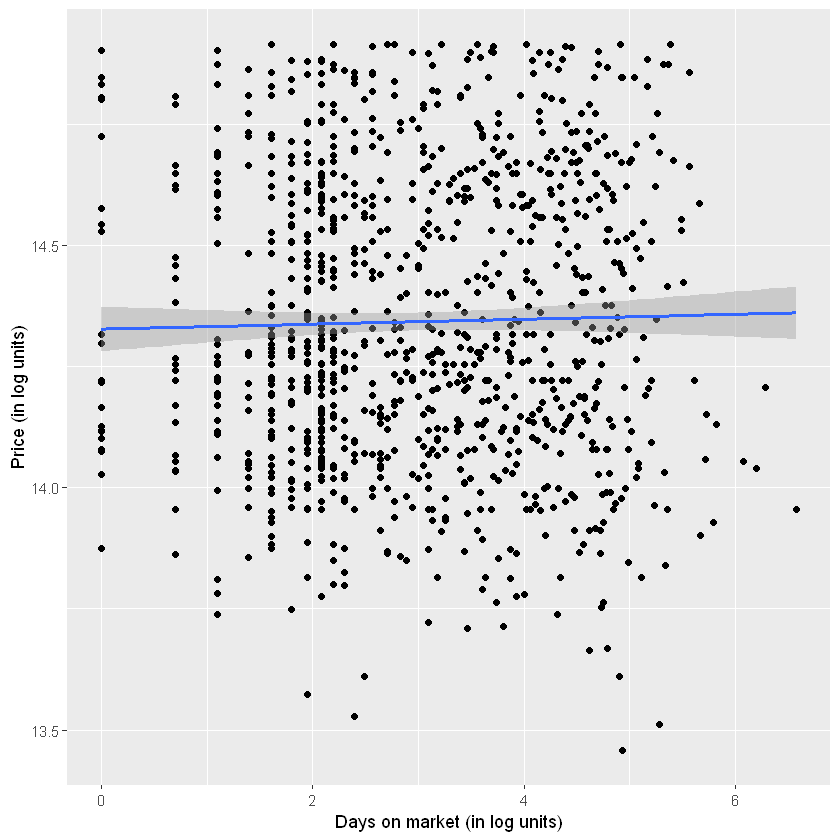

In [75]:
ggplot(mydata.train,aes(x=Days.on.market.sq,y=Price))+geom_point()+geom_smooth(method=lm) +
xlab("Days on market (# of days)") + ylab("Price (CAD)")

ggplot(mydata.train,aes(x=Days.on.market.log,y=Price))+geom_point()+geom_smooth(method=lm) +
xlab("Days on market (in log units)") + ylab("Price (CAD)")

ggplot(mydata.train,aes(x=Days.on.market.sq,y=Price.sq))+geom_point()+geom_smooth(method=lm) +
xlab("Days on market (# of days sqaured)") + ylab("Price (CAD squared)")

ggplot(mydata.train,aes(x=Days.on.market.log,y=Price.log))+geom_point()+geom_smooth(method=lm) +
xlab("Days on market (in log units)") + ylab("Price (in log units)")

# "We transform the days.on.market variable by log and also square it. However, we found that the relationship between days.on,market.log and price.log is NaN. Although there is correlation between days.on.market.sq and price.sq, the correlation is still not siginificant. As a result, we decided to delete the Days.on.market variable."

# Age and Price

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



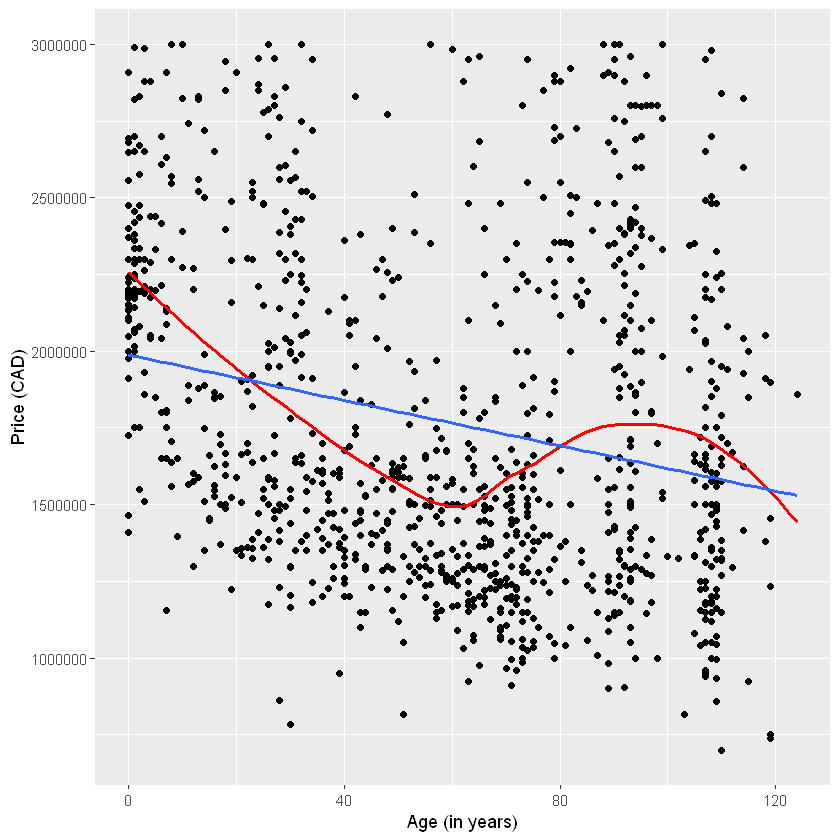

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



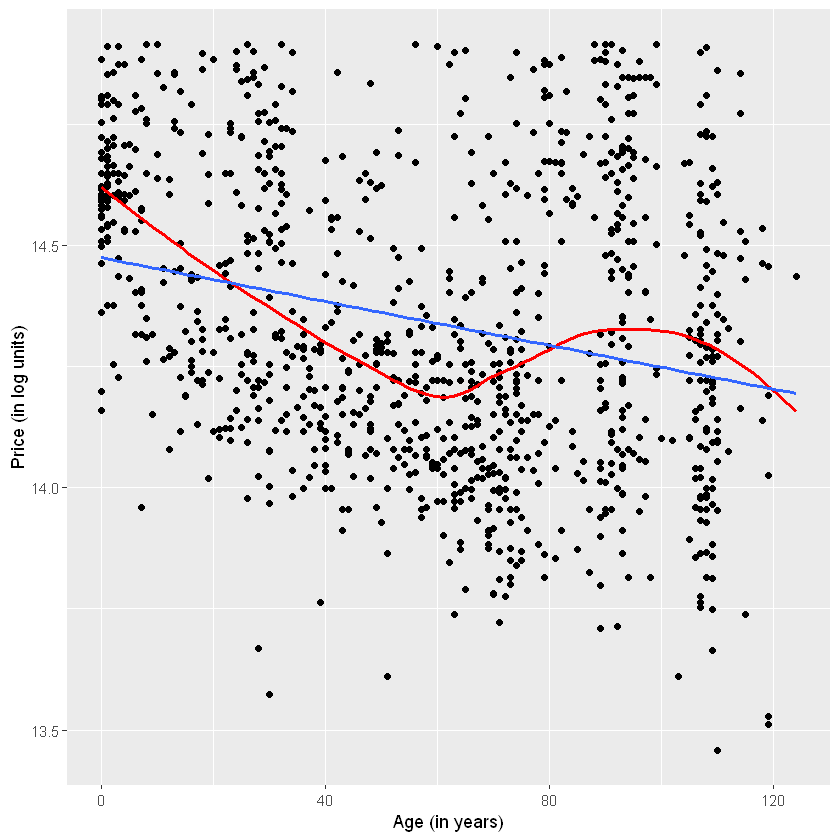

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



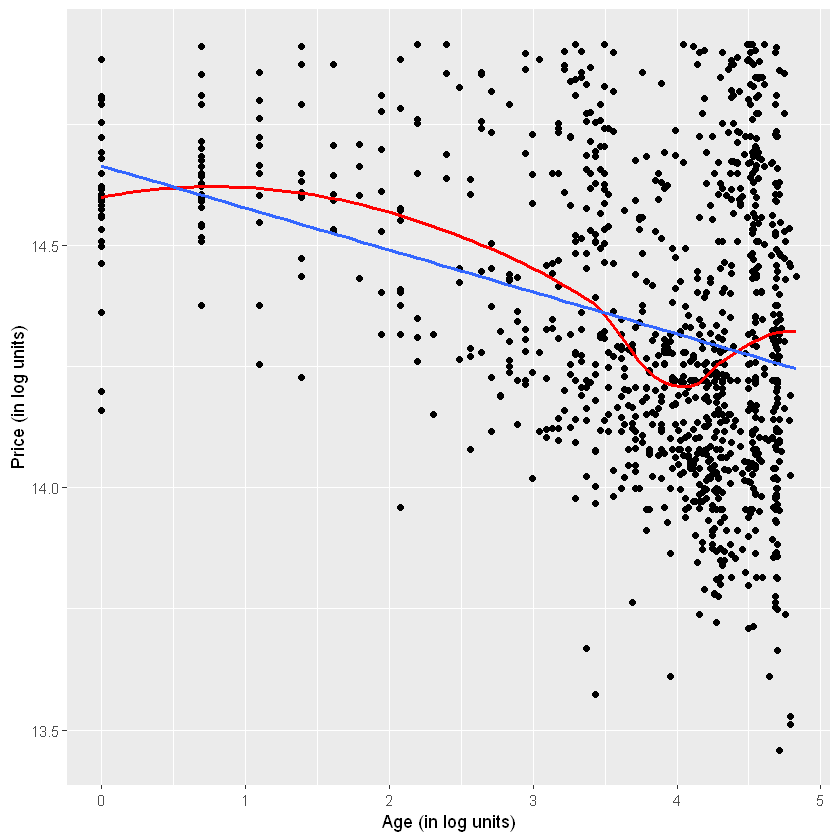

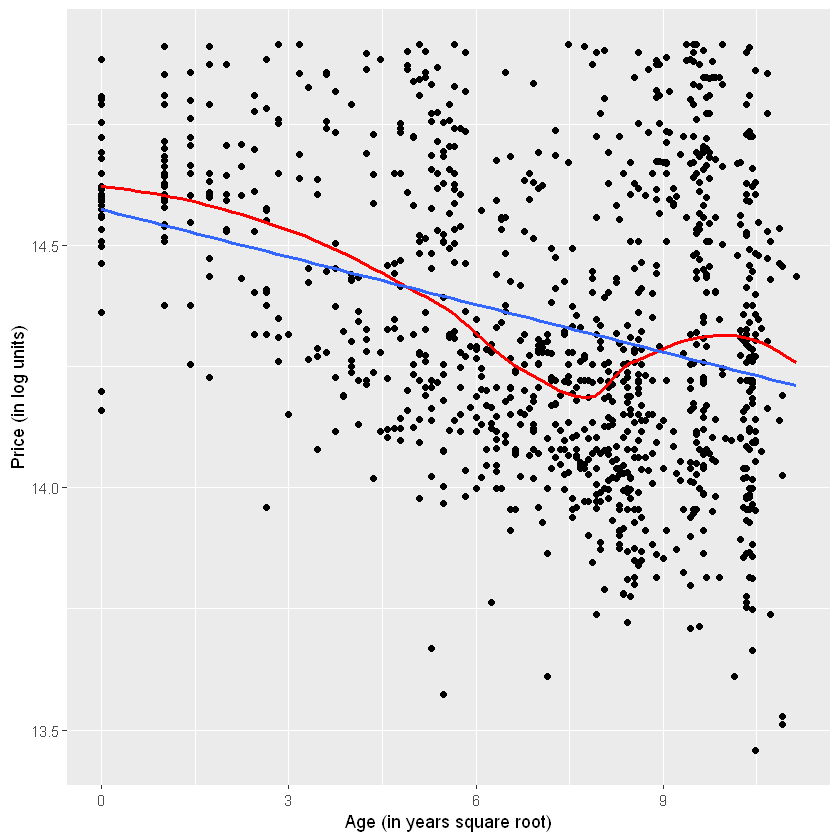

In [76]:
ggplot(mydata.train,aes(x=Age,y=Price))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Age (in years)") + ylab("Price (CAD)")
ggplot(mydata.train,aes(x=Age,y=Price.log))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Age (in years)") + ylab("Price (in log units)")
ggplot(mydata.train,aes(x=Age.log,y=Price.log))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Age (in log units)") + ylab("Price (in log units)")
ggplot(mydata.train,aes(x=sqrt(Age),y=Price.log))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Age (in years square root)") + ylab("Price (in log units)")

# We can see from these plots that the with any transformation of age or price the relationship is not linear. So, although removing the age term decreases the R-sq we still want to take that out from the model because of the non linearity

### "Now we need to decide to use different model to test if we could find the best linear model. We decided to use lot.size and total.floor.area to build our model. 

### We conduct the visulaization the associations between the y-variable and each x-variable.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



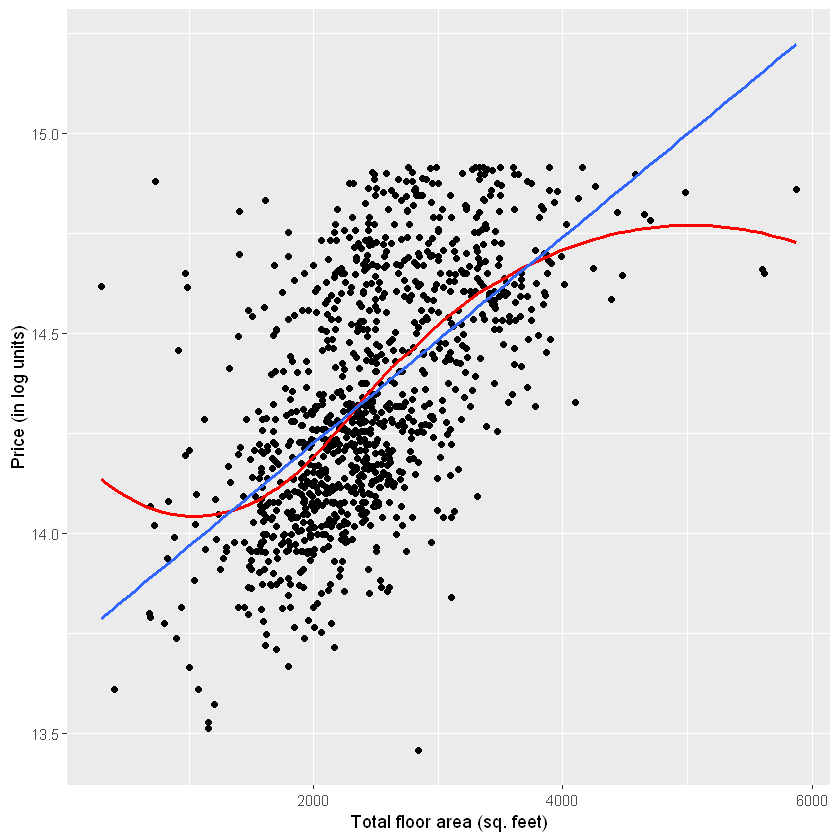

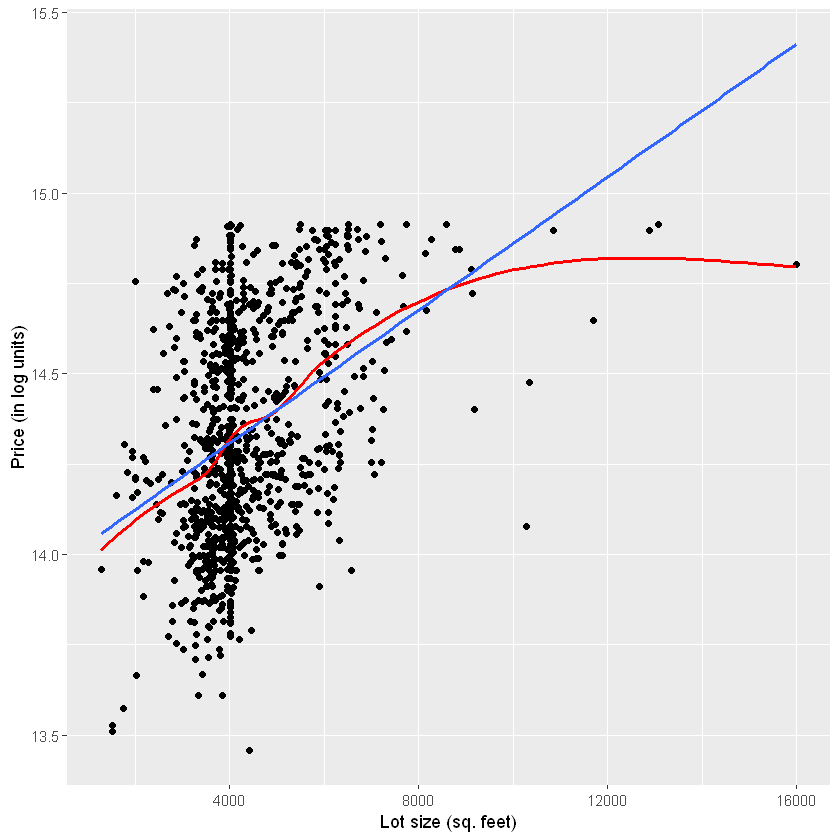

In [77]:
ggplot(mydata.train,aes(x=Total.floor.area,y=Price.log))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Total floor area (sq. feet)") + ylab("Price (in log units)")
ggplot(mydata.train,aes(x=Lot.Size,y=Price.log))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Lot size (sq. feet)") + ylab("Price (in log units)")

# From the scatterplots, we can easily tell that the associations are still linear.

### Fitting the final model

In [78]:
# Fit your final model here, use summary to get model co-efficients and other useful output:
z4 <- lm(Price.log ~ Total.floor.area + Lot.Size + Total.floor.area*Lot.Size, data=mydata.train)
summary(z4)
anova(z4)


Call:
lm(formula = Price.log ~ Total.floor.area + Lot.Size + Total.floor.area * 
    Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98571 -0.17646 -0.02729  0.16105  0.77262 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.323e+01  8.622e-02 153.397  < 2e-16 ***
Total.floor.area           3.654e-04  3.180e-05  11.491  < 2e-16 ***
Lot.Size                   1.280e-04  1.925e-05   6.648 4.80e-11 ***
Total.floor.area:Lot.Size -3.059e-08  6.487e-09  -4.715 2.74e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2348 on 1038 degrees of freedom
Multiple R-squared:  0.395,	Adjusted R-squared:  0.3933 
F-statistic: 225.9 on 3 and 1038 DF,  p-value: < 2.2e-16


Df   Sum Sq    Mean Sq     F value   Pr(>F)       
Total.floor.area             1 33.605768 33.60576788 609.44798 3.091114e-106
Lot.Size                     1  2.540854  2.54085403  46.07895  1.907148e-11
Total.floor.area:Lot.Size    1  1.226017  1.22601723  22.23409  2.742556e-06
Residuals                 1038 57.236693  0.05514132        NA            NA

In [79]:
z4.predict <- predict(z4)


<code style="background:yellow;color:black"> predicted value for house sale price (in log units) = 13.23 + 0.0003654*Total.floor.area + 0.0001280 * Lot.Size - 0.00000003059 * Total.floor.area * Lot.Size
</code> 





</code> Total.floor.area with a positive sign shows that there is positive association with the Price. For every 1 log unit change in floor area it increases the sale price of the house 0.0003654 log units.

Lot.Size with a positive sign shows that there is positive association with the Price. For every 1000 sq feet change in lot size it increases the sale price of the house 0.0001280 log units. 

The reason for including this interaction term is beacuse of the negative sign of the coefficient. Total.floor.area*Lot.Size with a negative sign and hence an interfering interaction shows that there is negative association with the Price. Also the coefficient term is very small because we are taking the total floor area and lot size as is. It compensates the higher values of total floor area and lot size

---
## Checking the assumptions


	Shapiro-Wilk normality test

data:  resid.values
W = 0.98555, p-value = 1.247e-08


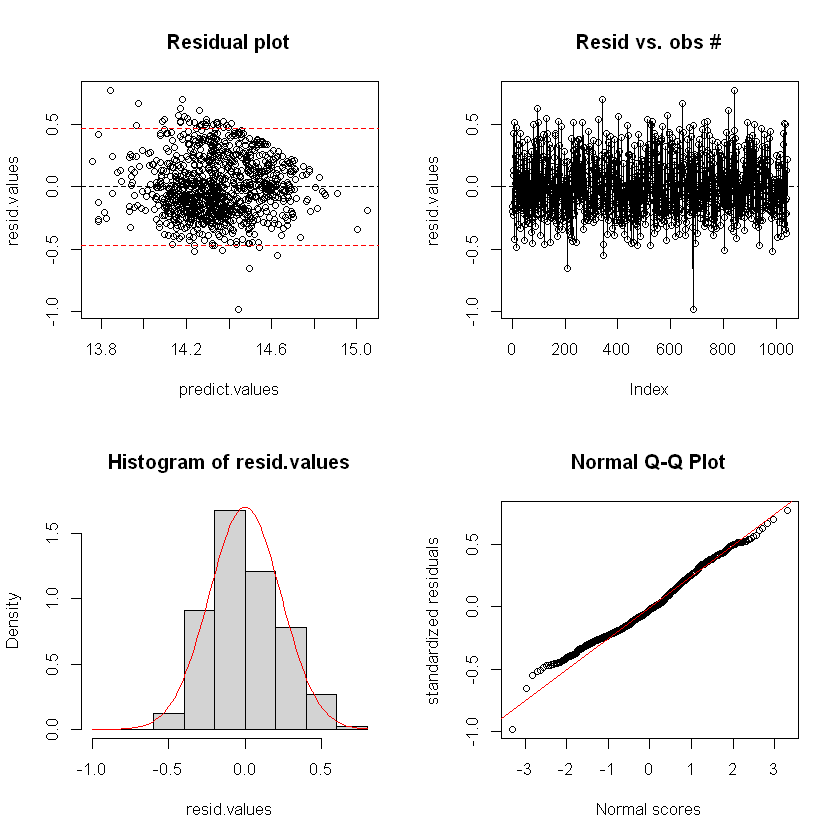

In [80]:
# Check assumptions of linearity, equal variance, normality here.
# Comment on any unusual observations (outliers) that are observed.
checkresiduals(z4)

# Observations on linearity, equal variance, normality here. 
1. Linearity - We can see from the residual plot that the residuals are randomly distributed above and below the zero line. And hence we can conclude that the assumption of linearity is met.
2. Equal Variance - Based on the residual plot we can say that the Equal variance / homoskedasticity of errors is almost met.We can see that most of the residuals lie within the -0.5 to 0.5 range throughout barring a few.
3. Normality - We can see that the residuals are normally distributed based on the histogram and the normal Q-Q plot. We do also see that as per the Shapiro test we should reject the null hypothesis meaning non normality, but we dont consider the result of the Shapiro test here because we have large amount of data. Shapiro test works well with less data.

### Outliers - Based on the graphs we see 2 points in the resid vs predicted plot that are possible outliers 

In [81]:
mydata.train <- cbind(mydata.train, z4.predict)
mydata.train$residual <- mydata.train$Price.log - mydata.train$z4.predict
mydata.train[order(mydata.train$residual),][1,c(2, 4, 6, 8, 9, 22)]
mydata.train[order(-mydata.train$residual), ][1,c(2, 4, 6, 8, 9, 22)]

Address           Price  Total.floor.area Age Lot.Size residual  
685 3090 KINGS AVENUE 700000 2838             110 4425     -0.9857125

Address            Price   Total.floor.area Age Lot.Size residual 
841 2964 W 28TH AVENUE 2230000 301              84  4290     0.7726151

Above are the outliers identified from the residual plot. For the 1st one even when the floor area and the lot size is large but the price is very low (700K) and for the other one, for a decent lot size the floor area is very less but the price is very high (2.23 Million), and are hence outliers. 

The assumption of independence could be violated in case we include the sample houses in our data from just one or two areas in Vancouver. Lets say we only include houses as our samples from Kitsilano and UBC neighborhood and try and predict for the entire Vancouver city. We have to do random sampling or else this is gonna lead to a space independence violation. The houses located in same area or close area will have probably same price due to the distance is closed.

Also if we take sample from different places but end up taking samples of only certain kind of houses like town houses, our prediction model would not work properly for other kind of houses and this may violate space independence assumption.

---
## Goodness of fit to the training set
Find the R2 value and the residual standard error. If you transformed the y-variable, get predicted values back in the original units, then calculate these yourself.

In [82]:
mydata.train$residual <- mydata.train$Price - exp(mydata.train$z4.predict)
error = sqrt(sum(mydata.train$residual^2)/(nrow(mydata.train) - 3 - 1)); error

[1] 427210.5

In [96]:
mydata.train$z4.predict.bt <- exp(mydata.train$z4.predict) 
SSY <- sum((mydata.train$Price - mean(mydata.train$Price))^2); SSY
SSE <- sum((mydata.train$Price - mydata.train$z4.predict.bt)^2); SSE

1 - (SSE/SSY)

[1] 3.017991e+14

[1] 1.894442e+14

[1] 0.3722838

#### We see that the pseudo R sq comes out to be 37.22% in comparison to our multiple R sq value which was 39.5%, not a big difference

---
## Analysis about the explanatory variables being related to each other

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



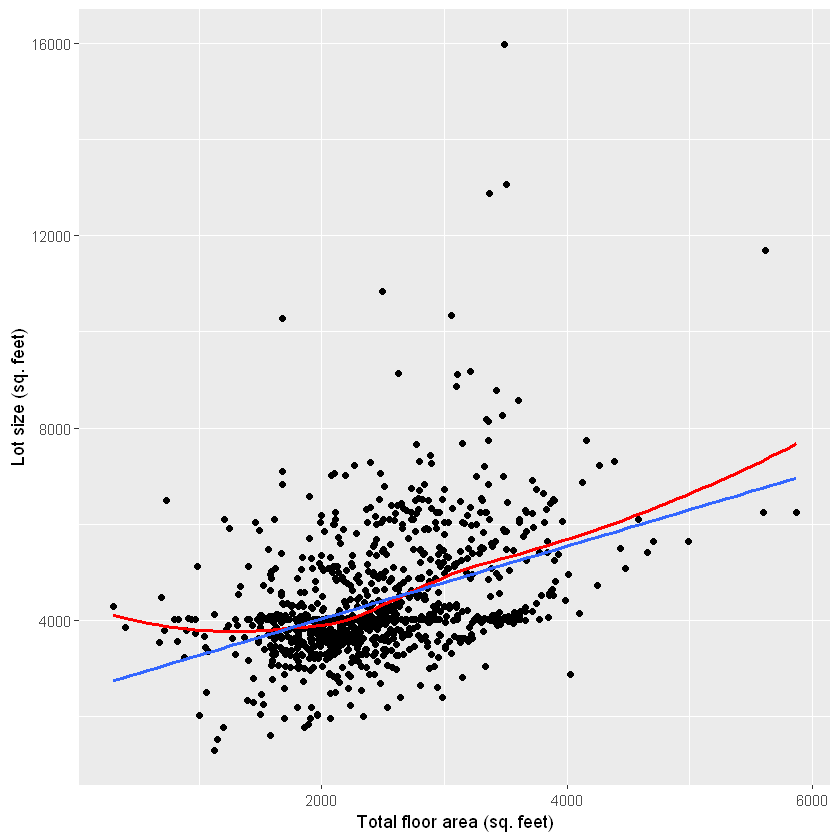

In [83]:
ggplot(mydata.train,aes(x=Total.floor.area,y=Lot.Size))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + ylab("Lot size (sq. feet)") + xlab("Total floor area (sq. feet)")

### We see some positive association between total floor area and lot size.. which to an extent seems likely also. Logically total floor area <= lot size.Probable impact on the model: Multicollinearity, which might reduce the precision of the estimated coefficients, which may weaken the statistical power of the model

In [84]:
evariable<-lm(Total.floor.area~Lot.Size,data=mydata.train)
summary(evariable)


Call:
lm(formula = Total.floor.area ~ Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2193.46  -389.94   -20.35   341.29  3000.09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.483e+03  6.982e+01   21.24   <2e-16 ***
Lot.Size    2.222e-01  1.532e-02   14.50   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 637.2 on 1040 degrees of freedom
Multiple R-squared:  0.1682,	Adjusted R-squared:  0.1674 
F-statistic: 210.3 on 1 and 1040 DF,  p-value: < 2.2e-16


VIF Test R-square is 0.1682

In [85]:
1/(1-0.1682)

[1] 1.202212

The VIF is 1.202 which means the two explanatory variables are not significantly related. As a result, these two variables will not affect our model.

---
<a id="Hyp_tests"></a>
## Hypothesis tests

Since we have the interaction term we only test the significance of the interaction. Applying partial F test

In [86]:
drop1(z4,test="F")
anova(z4)

Df Sum of Sq RSS      AIC       F value  Pr(>F)      
<none>                    NA       NA  57.23669 -3015.574       NA           NA
Total.floor.area:Lot.Size  1 1.226017  58.46271 -2995.489 22.23409 2.742556e-06

Df   Sum Sq    Mean Sq     F value   Pr(>F)       
Total.floor.area             1 33.605768 33.60576788 609.44798 3.091114e-106
Lot.Size                     1  2.540854  2.54085403  46.07895  1.907148e-11
Total.floor.area:Lot.Size    1  1.226017  1.22601723  22.23409  2.742556e-06
Residuals                 1038 57.236693  0.05514132        NA            NA

We don't do the t test for the other variables as we know that the interaction term is significant from the Partial F test. 


# The variable (Total.floor.area * Lot.Size) is significant in the final model (F statistic = 22.234, df error = 1038, p-value < 0.0001).

---
<a id="Prediction"></a>
## Using the model for prediction

In [87]:
# Include your code here
xnew <- as.data.frame(mydata.valid)
ynew.pred <- data.frame(predict(z4, newdata = xnew, interval = "prediction", level = 0.95)); ynew.pred
ynew.pred$bt.fit <- exp(ynew.pred$fit)
ynew.pred$bt.lwr <- exp(ynew.pred$lwr)
ynew.pred$bt.upr <- exp(ynew.pred$upr)

mydata.valid <- mydata.valid[-c(10)]
mydata.valid <- cbind(mydata.valid, bt.fit = ynew.pred$bt.fit, bt.lwr = ynew.pred$bt.lwr, bt.upr = ynew.pred$bt.upr)
mydata.valid$residuals <- mydata.valid$Price - mydata.valid$bt.fit
mydata.valid$abs_residuals <- abs(mydata.valid$residuals)
mydata.valid$abs_residuals.sq <- mydata.valid$abs_residuals ^ 2

mae = sum(mydata.valid$abs_residuals)/nrow(mydata.valid); mae
rmse = sqrt(sum(mydata.valid$abs_residuals.sq)/nrow(mydata.valid)); rmse

fit      lwr      upr     
1043 14.37948 13.91839 14.84057
1044 14.13694 13.67562 14.59826
1045 14.46234 14.00111 14.92357
1046 14.13145 13.66983 14.59306
1047 14.44968 13.98859 14.91077
1048 14.19508 13.73392 14.65623
1049 14.18136 13.72019 14.64253
1050 14.32061 13.85958 14.78164
1051 14.16964 13.70842 14.63086
1052 14.57266 14.11118 15.03413
1053 14.48301 14.02178 14.94425
1054 14.31935 13.85833 14.78038
1055 14.32230 13.86123 14.78337
1056 14.25566 13.79439 14.71693
1057 14.79379 14.22447 15.36312
1058 14.41054 13.94947 14.87162
1059 14.24055 13.77945 14.70164
1060 14.30384 13.84281 14.76486
1061 14.41746 13.95632 14.87860
1062 13.84888 13.38558 14.31219
1063 14.29048 13.82941 14.75156
1064 14.27156 13.81049 14.73263
1065 14.36518 13.90406 14.82630
1066 14.55271 14.09098 15.01445
1067 14.26956 13.80852 14.73060
1068 14.62579 14.16184 15.08974
1069 14.15535 13.69409 14.61661
1070 14.31039 13.84936 14.77141
1071 14.08960 13.62812 14.55107
1072 14.25677 13.79550 14.71804
⋮    ⋮        ⋮        ⋮       
1273 14.40777 13.94665 14.86889
1274 14.48390 14.02213 14.94567
1275 14.48020 14.01861 14.94178
1276 14.23951 13.77816 14.70086
1277 14.47532 14.01021 14.94043
1278 14.31780 13.85652 14.77907
1279 14.13756 13.67595 14.59917
1280 14.30722 13.84619 14.76826
1281 14.11990 13.65856 14.58124
1282 14.21373 13.75262 14.67485
1283 14.72067 14.25778 15.18356
1284 14.36029 13.89924 14.82134
1285 14.33340 13.87237 14.79443
1286 14.40802 13.94675 14.86929
1287 14.73937 14.27229 15.20646
1288 14.44921 13.98780 14.91061
1289 14.37883 13.91776 14.83989
1290 14.10725 13.64581 14.56869
1291 14.10982 13.64843 14.57120
1292 14.24692 13.78586 14.70798
1293 14.18518 13.72386 14.64650
1294 14.27757 13.81654 14.73861
1295 14.14025 13.67895 14.60156
1296 14.30675 13.84573 14.76778
1297 14.77101 14.30826 15.23376
1298 14.59640 14.13412 15.05868
1299 14.29151 13.83048 14.75254
1300 14.58735 14.12549 15.04921
1301 14.29281 13.83163 14.75400
1302 14.40896 13.94791 14.87002

[1] 356396

[1] 452915.3

In [95]:
# Calculating the % accuracy of our model
mydata.valid$accuracy <-abs(mydata.valid$bt.fit - mydata.valid$Price)/mydata.valid$Price
mydata.valid$accuracy.perc <- (1 - abs(mydata.valid$residuals/mydata.valid$Price)) * 100
avg.accuracy = mean(mydata.valid$accuracy.perc); paste(round(avg.accuracy,2), '%')

[1] "79.8 %"

---
<a id="Compare"></a>
## Comparing to other candidate models

| Model | MAE | root MSE | model statement|
|------|------|------|------|
| Final model | 356396.02 | 452915.33 | Price.log ~ Total.floor.area + Lot.Size + Total.floor.area * Lot.Size|
| Model A | 363846.02 | 459853.02 | Price.log ~ Total.floor.area + Lot.size.log + Total.floor.area * Lot.size.log|
| Model B | 362768.60 | 453039.94 | Price.log ~ Total.floor.area.log + Lot.Size + Total.floor.area.log * Lot.Size |


---
<a id="Discussion"></a>
# Discussion
 
In order to evaluate the wellness of our final model, we decided to introduce a new variable 'accuracy.perc’ to check how accurate are our predictions. We decided to use the 1 - (residual value / the origin price)*100% to represent the accuracy we calculated on each house and then we calculated the average accuracy. As a result, we got close to 80% accuracy on average. We can conclude that this model matches our goal of helping realtors predict housing prices. 

Our model has the following characteristics:  

Strengths - 
1. We are able to predict house prices on an avg of 80% which is good predicting power.
2. Simplicity (Very less complexity) - the realtor will only need floor area and the lot size to predict the housing prices.
3. We got a respectable R - sq (39.5%) and adjusted R - sq (39.33%) value.
4. All the variables had 99% statistical significance.

Limitations - 
1. Although, the VIF (Variance Inflation Factor) is low for total floor area and the lot size, they are not completely independent of each other and therefore may impact each other.
2. This model would not work if the interest rate changes as the housing prices in Vancouver depend also on the bank interest rates.
3. This model would not work for predicting the prices of the apartments. 
4. This model would not work n years into the future.


Based on the above limitations, we have the following recommendations:

1. Instead of the Lot size, if we would have the area like a garden size.. or area other than the floor area separately, then the multicollinearity issue would not be there and our estimate could be better.
2. Address as another variable, and we could include a parameter that would measure the prime-ness of the location on a scale of 1 to 10.
3. Ranking of the locations based on factors like proximity to sky train station, schools, supermarkets etc.
4. Include a factor of interest rates in the model.
5. We also should include data for apartments.
6. We should include more data from before 2019 and post covid to predict better for the future.


---
<a id="Transformations"></a>
# Visualizing appropriate transformations


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



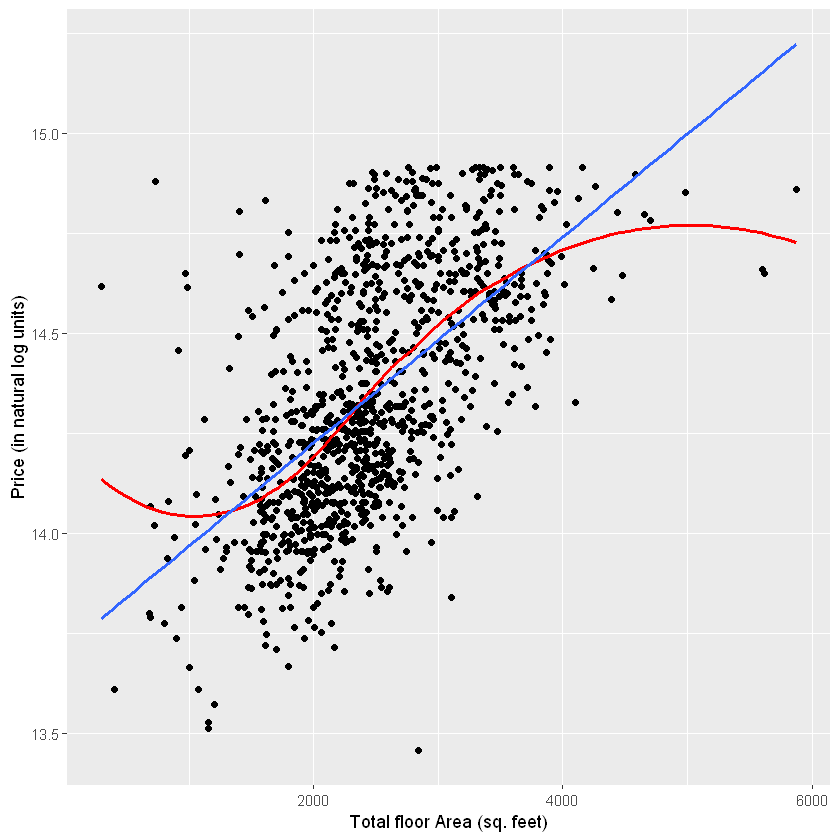

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



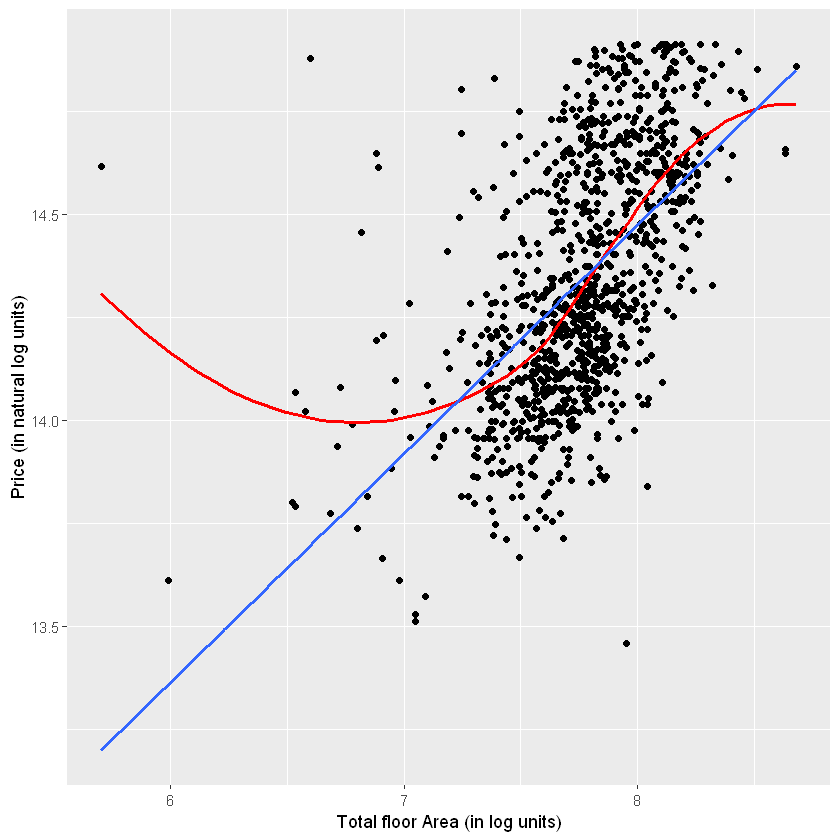

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



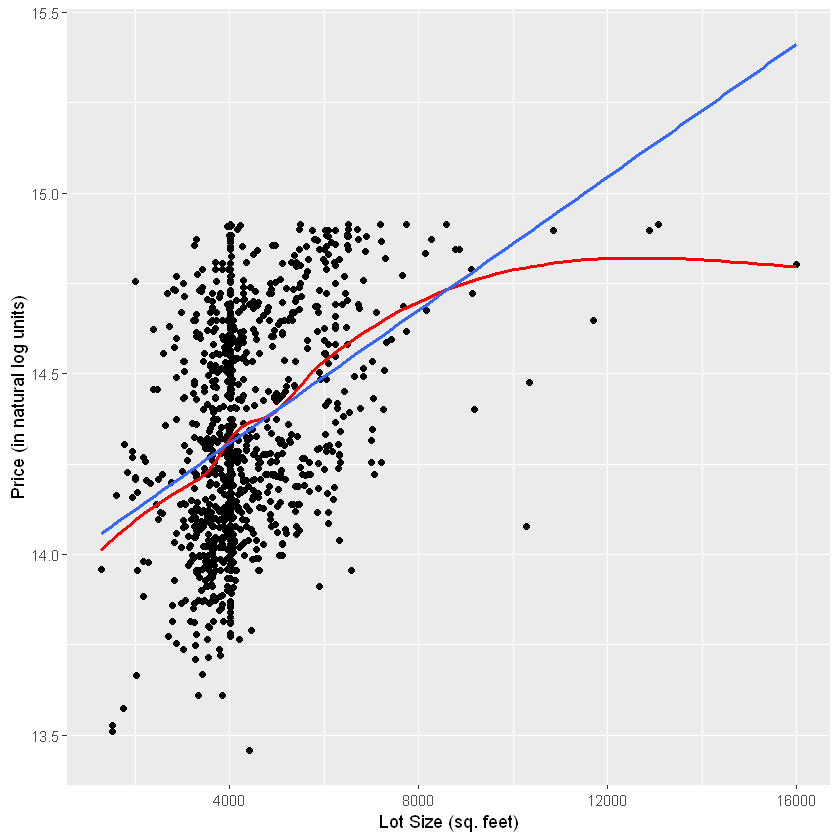

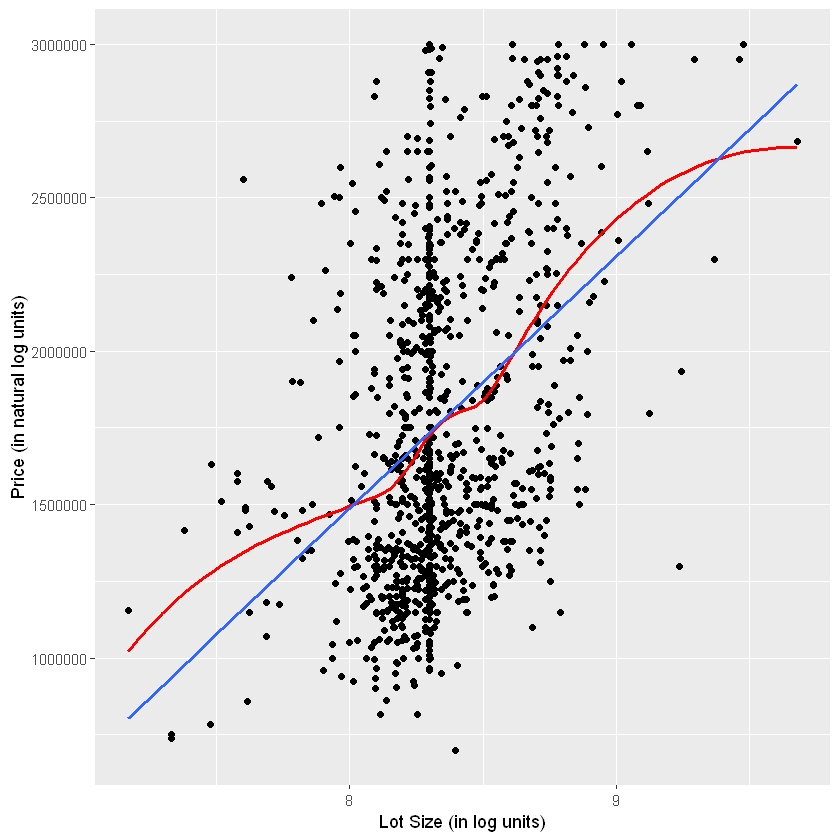

In [89]:
# Include the code for visualizing appropriate transformations of the variables here
ggplot(mydata.train,aes(x=Total.floor.area,y=Price.log))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Total floor Area (sq. feet)") + ylab("Price (in natural log units)")
ggplot(mydata.train,aes(x=Total.floor.area.log,y=Price.log))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Total floor Area (in log units)") + ylab("Price (in natural log units)")

ggplot(mydata.train,aes(x=Lot.Size,y=Price.log))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Lot Size (sq. feet)") + ylab("Price (in natural log units)")
ggplot(mydata.train,aes(x=Lot.size.log,y=Price))+geom_point()+geom_smooth(method=loess,se=FALSE,color='red')+
  geom_smooth(method=lm,se=FALSE) + xlab("Lot Size (in log units)") + ylab("Price (in natural log units)")

---
<a id="Other_models"></a>
# Other candidate models

In [90]:
# Include the code for your other candidate models here.
z4.candidate1 <- lm(Price.log ~ Total.floor.area + Lot.size.log + Total.floor.area*Lot.size.log, 
                data=mydata.train)
summary(z4.candidate1)

z4.candidate2 <- lm(Price.log ~ Total.floor.area.log + Lot.Size + Total.floor.area.log*Lot.Size, 
                    data=mydata.train)
summary(z4.candidate2)

mydata.valid$Total.floor.area.log <- log(mydata.valid$Total.floor.area)
mydata.valid$Lot.size.log <- log(mydata.valid$Lot.Size)

xnew <- as.data.frame(mydata.valid)
ynew.pred1 <- data.frame(predict(z4.candidate1, newdata = xnew, interval = "prediction", level = 0.95)); ynew.pred1
ynew.pred2 <- data.frame(predict(z4.candidate2, newdata = xnew, interval = "prediction", level = 0.95)); ynew.pred2
ynew.pred1$bt.fit <- exp(ynew.pred1$fit)
ynew.pred1$bt.lwr <- exp(ynew.pred1$lwr)
ynew.pred1$bt.upr <- exp(ynew.pred1$upr)
ynew.pred2$bt.fit <- exp(ynew.pred2$fit)
ynew.pred2$bt.lwr <- exp(ynew.pred2$lwr)
ynew.pred2$bt.upr <- exp(ynew.pred2$upr)




mydata.valid <- cbind(mydata.valid, bt.fit1 = ynew.pred1$bt.fit, bt.lwr1 = ynew.pred1$bt.lwr, bt.upr1 = ynew.pred1$bt.upr)
mydata.valid <- cbind(mydata.valid, bt.fit2 = ynew.pred2$bt.fit, bt.lwr2 = ynew.pred2$bt.lwr, bt.upr2 = ynew.pred2$bt.upr)
mydata.valid$residuals1 <- mydata.valid$Price - mydata.valid$bt.fit1
mydata.valid$residuals2 <- mydata.valid$Price - mydata.valid$bt.fit2
mydata.valid$abs_residuals1 <- abs(mydata.valid$residuals1)
mydata.valid$abs_residuals.sq1 <- mydata.valid$abs_residuals1 ^ 2
mydata.valid$abs_residuals2 <- abs(mydata.valid$residuals2)
mydata.valid$abs_residuals.sq2 <- mydata.valid$abs_residuals2 ^ 2

mae1 = sum(mydata.valid$abs_residuals1)/nrow(mydata.valid); mae1
rmse1 = sqrt(sum(mydata.valid$abs_residuals.sq1)/nrow(mydata.valid)); rmse1

mae2 = sum(mydata.valid$abs_residuals2)/nrow(mydata.valid); mae2
rmse2 = sqrt(sum(mydata.valid$abs_residuals.sq2)/nrow(mydata.valid)); rmse2


Call:
lm(formula = Price.log ~ Total.floor.area + Lot.size.log + Total.floor.area * 
    Lot.size.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98847 -0.17755 -0.02923  0.17079  0.76401 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    9.987e+00  7.222e-01  13.827  < 2e-16 ***
Total.floor.area               1.078e-03  2.769e-04   3.894 0.000105 ***
Lot.size.log                   4.546e-01  8.656e-02   5.251 1.83e-07 ***
Total.floor.area:Lot.size.log -1.014e-04  3.284e-05  -3.088 0.002070 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2364 on 1038 degrees of freedom
Multiple R-squared:  0.3871,	Adjusted R-squared:  0.3853 
F-statistic: 218.5 on 3 and 1038 DF,  p-value: < 2.2e-16



Call:
lm(formula = Price.log ~ Total.floor.area.log + Lot.Size + Total.floor.area.log * 
    Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98201 -0.18354 -0.01438  0.17305  1.25570 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    8.866e+00  6.257e-01  14.170  < 2e-16 ***
Total.floor.area.log           6.741e-01  7.986e-02   8.441  < 2e-16 ***
Lot.Size                       4.120e-04  1.399e-04   2.944  0.00331 ** 
Total.floor.area.log:Lot.Size -4.571e-05  1.768e-05  -2.586  0.00985 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2405 on 1038 degrees of freedom
Multiple R-squared:  0.3656,	Adjusted R-squared:  0.3638 
F-statistic: 199.4 on 3 and 1038 DF,  p-value: < 2.2e-16


fit      lwr      upr     
1043 14.38397 13.91984 14.84809
1044 14.14697 13.68261 14.61133
1045 14.46512 14.00086 14.92938
1046 14.13695 13.67223 14.60166
1047 14.45023 13.98611 14.91435
1048 14.20379 13.73961 14.66798
1049 14.19027 13.72610 14.65444
1050 14.32650 13.86245 14.79056
1051 14.17893 13.71468 14.64319
1052 14.56462 14.10003 15.02922
1053 14.48544 14.02119 14.94969
1054 14.32525 13.86119 14.78930
1055 14.32535 13.86123 14.78946
1056 14.25621 13.79179 14.72062
1057 15.09305 14.56512 15.62098
1058 14.41414 13.95005 14.87824
1059 14.24753 13.78342 14.71164
1060 14.31002 13.84597 14.77407
1061 14.42113 13.95695 14.88531
1062 13.85985 13.39318 14.32653
1063 14.29634 13.83223 14.76045
1064 14.27798 13.81388 14.74207
1065 14.36956 13.90539 14.83373
1066 14.55262 14.08777 15.01748
1067 14.27667 13.81261 14.74073
1068 14.56000 14.09397 15.02603
1069 14.16496 13.70067 14.62926
1070 14.31649 13.85244 14.78054
1071 14.09945 13.63498 14.56392
1072 14.25737 13.79296 14.72179
⋮    ⋮        ⋮        ⋮       
1273 14.41166 13.94750 14.87582
1274 14.46084 13.99616 14.92551
1275 14.46214 13.99760 14.92669
1276 14.24080 13.77637 14.70523
1277 14.39656 13.93004 14.86308
1278 14.31841 13.85395 14.78287
1279 14.13194 13.66709 14.59678
1280 14.31225 13.84817 14.77632
1281 14.13022 13.66588 14.59455
1282 14.22202 13.75788 14.68616
1283 14.72695 14.26069 15.19322
1284 14.36526 13.90118 14.82934
1285 14.33898 13.87492 14.80303
1286 14.40120 13.93691 14.86549
1287 14.75013 14.28044 15.21982
1288 14.45062 13.98608 14.91516
1289 14.38337 13.91927 14.84747
1290 14.11530 13.65085 14.57974
1291 14.11978 13.65540 14.58416
1292 14.25446 13.79037 14.71855
1293 14.18731 13.72291 14.65171
1294 14.28426 13.82020 14.74833
1295 14.14863 13.68433 14.61294
1296 14.31293 13.84888 14.77698
1297 14.77848 14.31249 15.24447
1298 14.56868 14.10343 15.03392
1299 14.29808 13.83402 14.76213
1300 14.58687 14.12191 15.05183
1301 14.29594 13.83166 14.76021
1302 14.41060 13.94652 14.87469

fit      lwr      upr     
1043 14.38444 13.91227 14.85661
1044 14.15150 13.67912 14.62389
1045 14.44735 13.97508 14.91962
1046 14.12945 13.65660 14.60231
1047 14.45224 13.98008 14.92440
1048 14.21859 13.74640 14.69077
1049 14.20679 13.73459 14.67899
1050 14.33743 13.86532 14.80954
1051 14.19036 13.71810 14.66262
1052 14.56694 14.09436 15.03951
1053 14.46494 13.99267 14.93721
1054 14.33705 13.86495 14.80914
1055 14.34400 13.87188 14.81612
1056 14.27338 13.80104 14.74573
1057 14.90804 14.38373 15.43234
1058 14.41350 13.94136 14.88565
1059 14.26436 13.79221 14.73651
1060 14.32404 13.85195 14.79612
1061 14.41379 13.94157 14.88601
1062 13.73721 13.26063 14.21380
1063 14.30869 13.83654 14.78084
1064 14.29247 13.82033 14.76461
1065 14.37039 13.89819 14.84260
1066 14.49889 14.02628 14.97150
1067 14.29268 13.82059 14.76478
1068 14.65519 14.18024 15.13013
1069 14.17376 13.70145 14.64606
1070 14.32940 13.85731 14.80149
1071 14.10737 13.63484 14.57989
1072 14.27436 13.80202 14.74671
⋮    ⋮        ⋮        ⋮       
1273 14.40672 13.93452 14.87892
1274 14.50250 14.02975 14.97525
1275 14.49683 14.02424 14.96941
1276 14.26000 13.78758 14.73243
1277 14.49119 14.01490 14.96747
1278 14.32463 13.85225 14.79700
1279 14.16528 13.69264 14.63791
1280 14.32898 13.85688 14.80107
1281 14.14003 13.66765 14.61240
1282 14.23830 13.76615 14.71045
1283 14.67243 14.19866 15.14619
1284 14.37054 13.89841 14.84267
1285 14.34880 13.87670 14.82091
1286 14.42635 13.95406 14.89864
1287 14.74239 14.26472 15.22006
1288 14.42786 13.95542 14.90029
1289 14.38534 13.91319 14.85749
1290 14.12994 13.65748 14.60241
1291 14.12990 13.65748 14.60232
1292 14.27152 13.79942 14.74363
1293 14.21108 13.73872 14.68344
1294 14.30064 13.82855 14.77272
1295 14.16510 13.69277 14.63742
1296 14.32626 13.85417 14.79835
1297 14.67184 14.19856 15.14512
1298 14.61056 14.13714 15.08398
1299 14.31266 13.84057 14.78475
1300 14.52176 14.04909 14.99442
1301 14.30692 13.83466 14.77919
1302 14.41858 13.94645 14.89070

[1] 363846

[1] 459853

[1] 362768.6

[1] 453039.9